In [10]:
import combat
import numpy as np
import scipy.stats as stats
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500

In [2]:
datafilename = "052220_peak_areas_id_feature_pns_idx_batches1_4.csv"
data = pd.read_csv(datafilename)
data = data.fillna(0)
print(data)

                                         Molecule Name  Precursor Charge  \
0                                     1_Pipecolic acid                 1   
1                         2_Bis 2 ethylhexyl phthalate                 1   
2                            3_cis 4 Hydroxy D proline                 1   
3                                           4_Creatine                 1   
4                                            5_Leucine                 1   
..                                                 ...               ...   
169                             170_D-PANTOTHENIC ACID                -1   
170                                   171_Nicotinamide                 1   
171                                        172_Taurine                 1   
172                                    173_D   Maltose                 1   
173  174_N1 3 Chloro 5 trifluoromethyl 2 pyridyl N2...                 1   

     Precursor Mz  Explicit Retention Time  B1_pns_Blank_1 Area  \
0      130.086308   

In [29]:
areaCols = [x for x in data.columns.values if "Area" in x and "B1" not in x]
areaData = data[areaCols].transpose()
batchInfo = [int(x.split("_")[0][1]) for x in list(areaData.index.values)]


In [30]:
imp = IterativeImputer(RandomForestRegressor(n_jobs=20,random_state=0),missing_values=0,random_state=0)
data_imp = imp.fit_transform(areaData)
data_imp  = np.log2(data_imp)
# data_imp_norm = combat.combat(pd.DataFrame(data_imp.transpose()),batchInfo).transpose().to_numpy()
# pkl.dump(data_imp_norm,open("peak_areas_id_imp_norm.pkl","wb"))
pkl.dump(data_imp,open("peak_areas_id_imp_b2_4.pkl","wb"))


data_imp = pkl.load(open("peak_areas_id_imp_b2_4.pkl","rb"))
#data_imp_norm = pkl.load(open("peak_areas_id_imp_norm.pkl","rb"))

In [31]:
blankSamp = [x for x in range(len(areaCols)) if "Blank" in areaCols[x] and not "equil" in areaCols[x]]
blankData = data_imp[blankSamp]
print(len(blankSamp))

16


In [32]:
qcSamp = [x for x in range(len(areaCols)) if "NIST" in areaCols[x] and not "equil" in areaCols[x] ]
qcData = data_imp[qcSamp]
print(len(qcData))

36


In [33]:
sampCols = [x for x in range(len(areaCols)) if "WU350" in areaCols[x] and not "equil" in areaCols[x]]
sampData = data_imp[sampCols]
print(len(sampCols))

264


Text(0.5, 1.0, 'w/o combat')

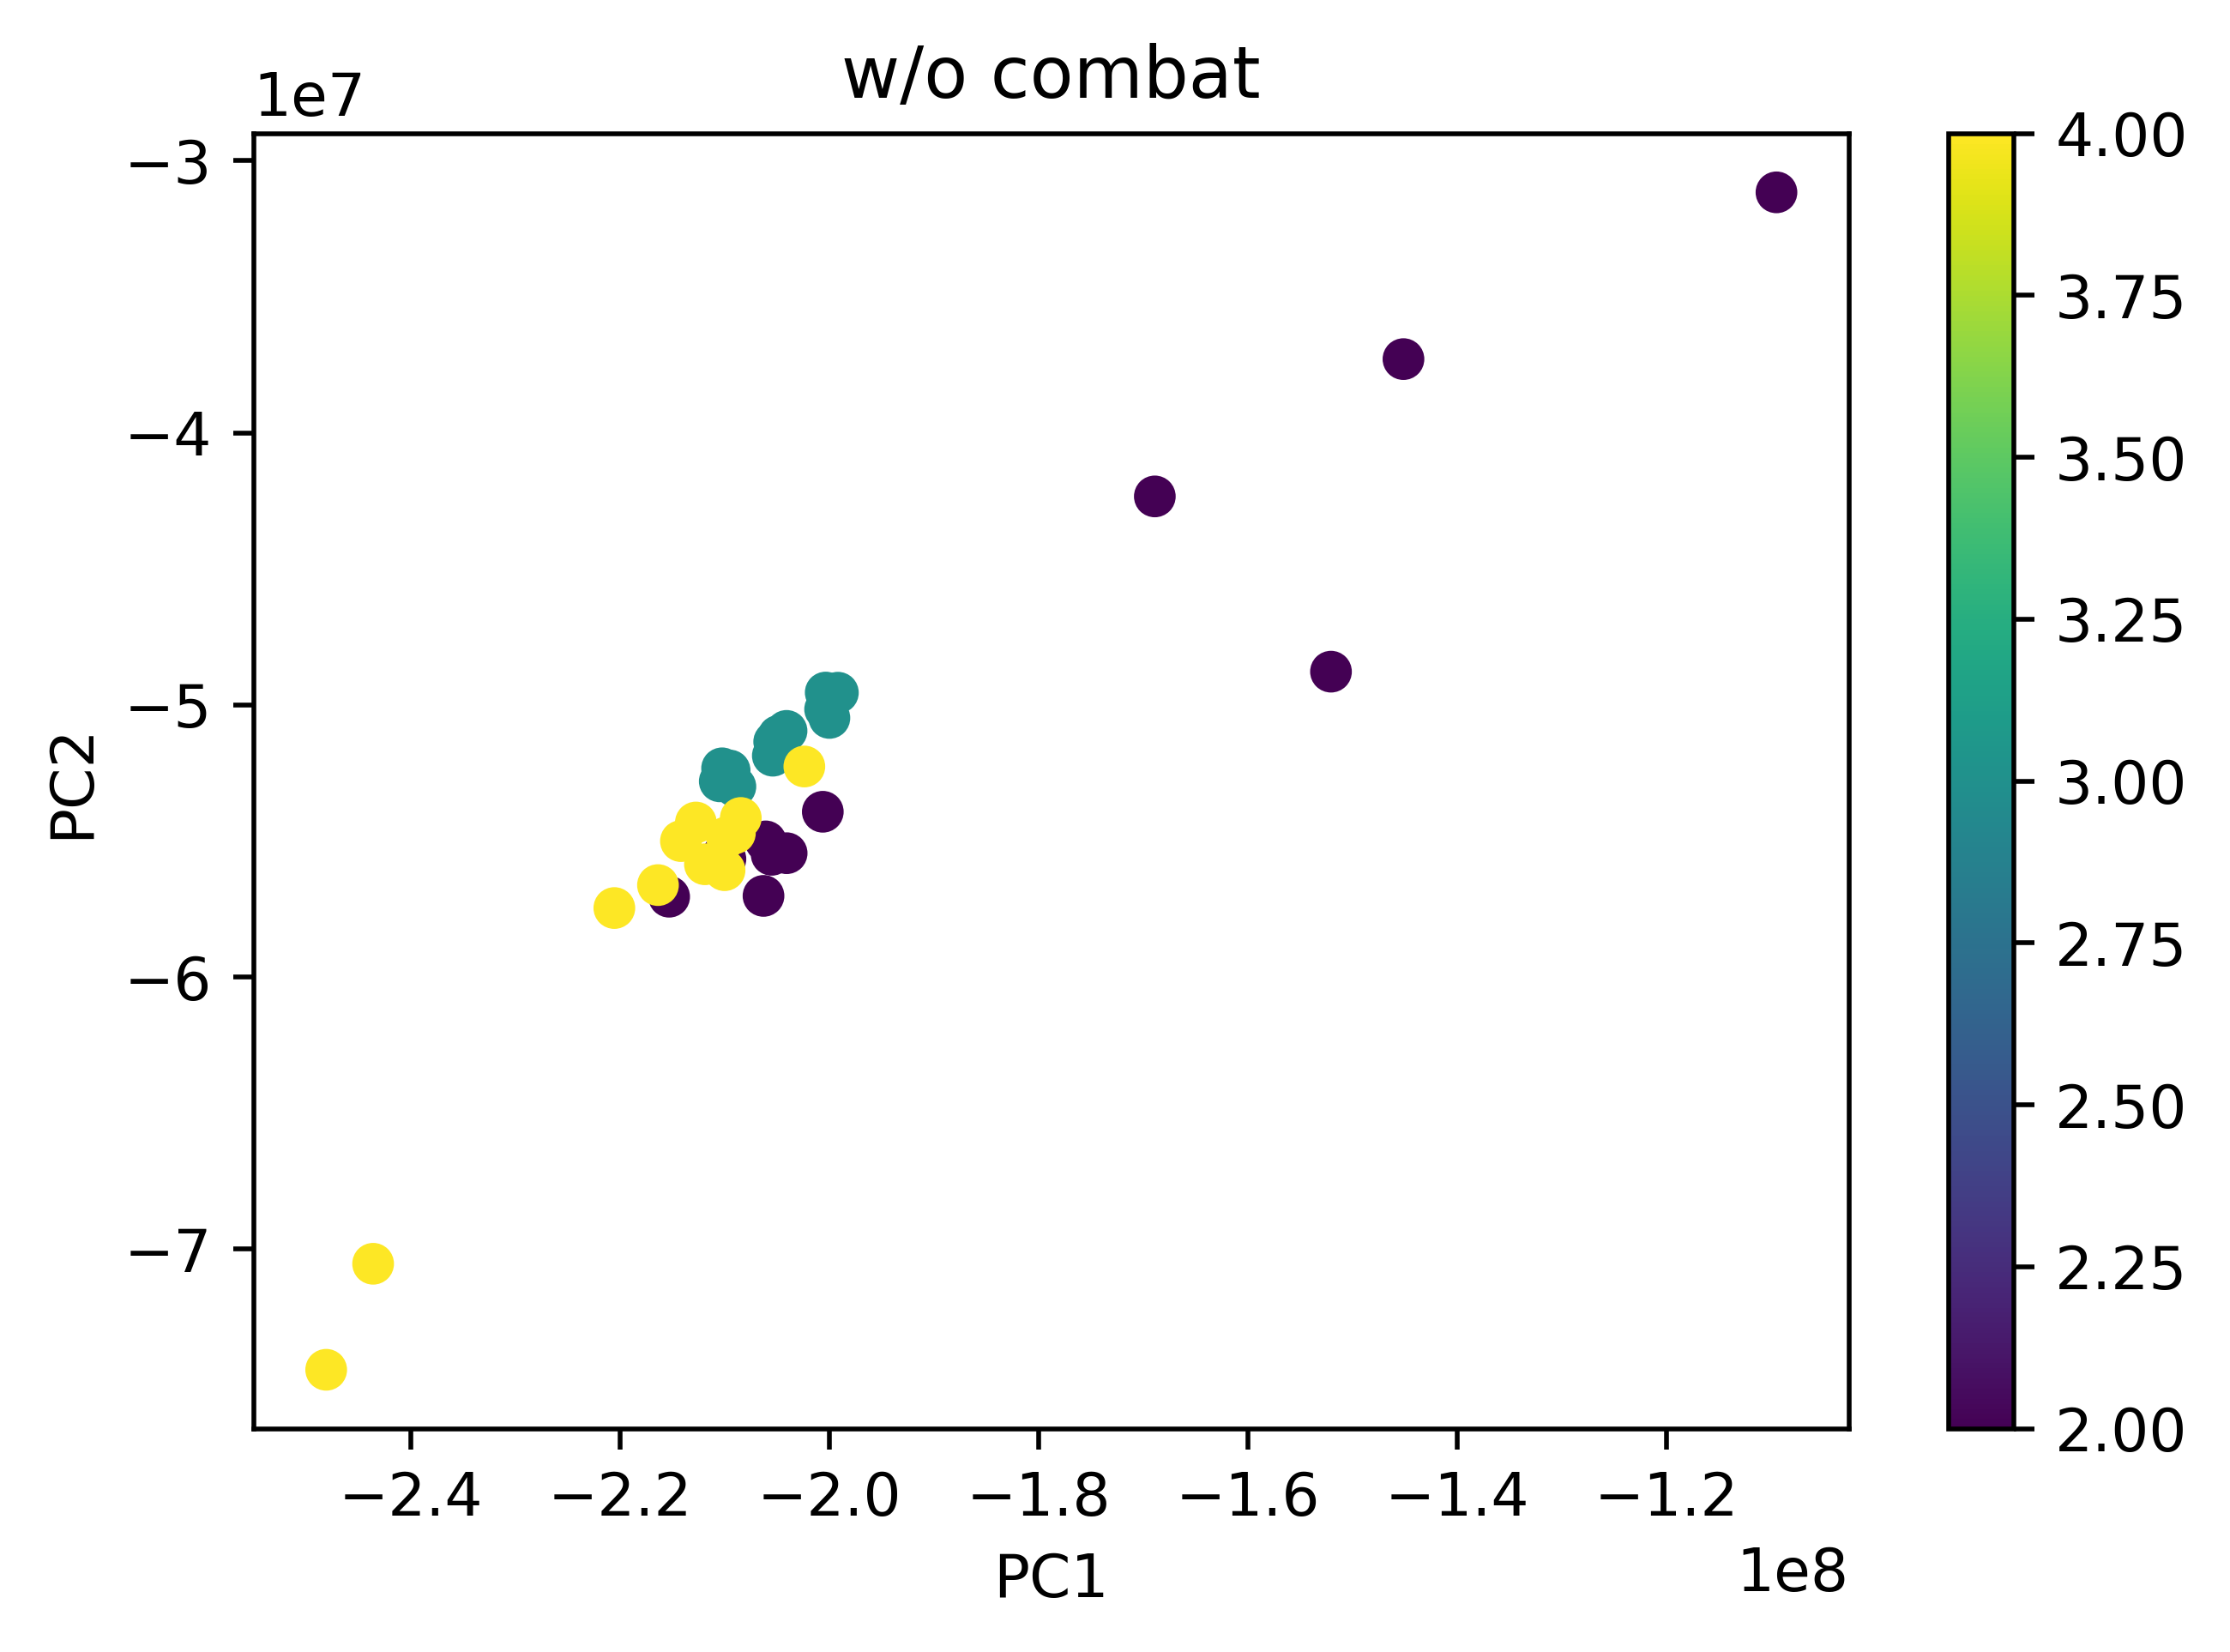

In [34]:
pca = PCA(n_components=2)


plt.figure()
pca.fit(data_imp)
qcSamp_reduced = pca.transform(areaData.to_numpy()[qcSamp])
plt.scatter(qcSamp_reduced[:,0],qcSamp_reduced[:,1],c=[batchInfo[x] for x in qcSamp])
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("w/o combat")

In [35]:
# [qcSamp[x] for x in range(len(qcSamp)) if qcSamp_reduced[x][0] > 30]
# print(areaCols[47])

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


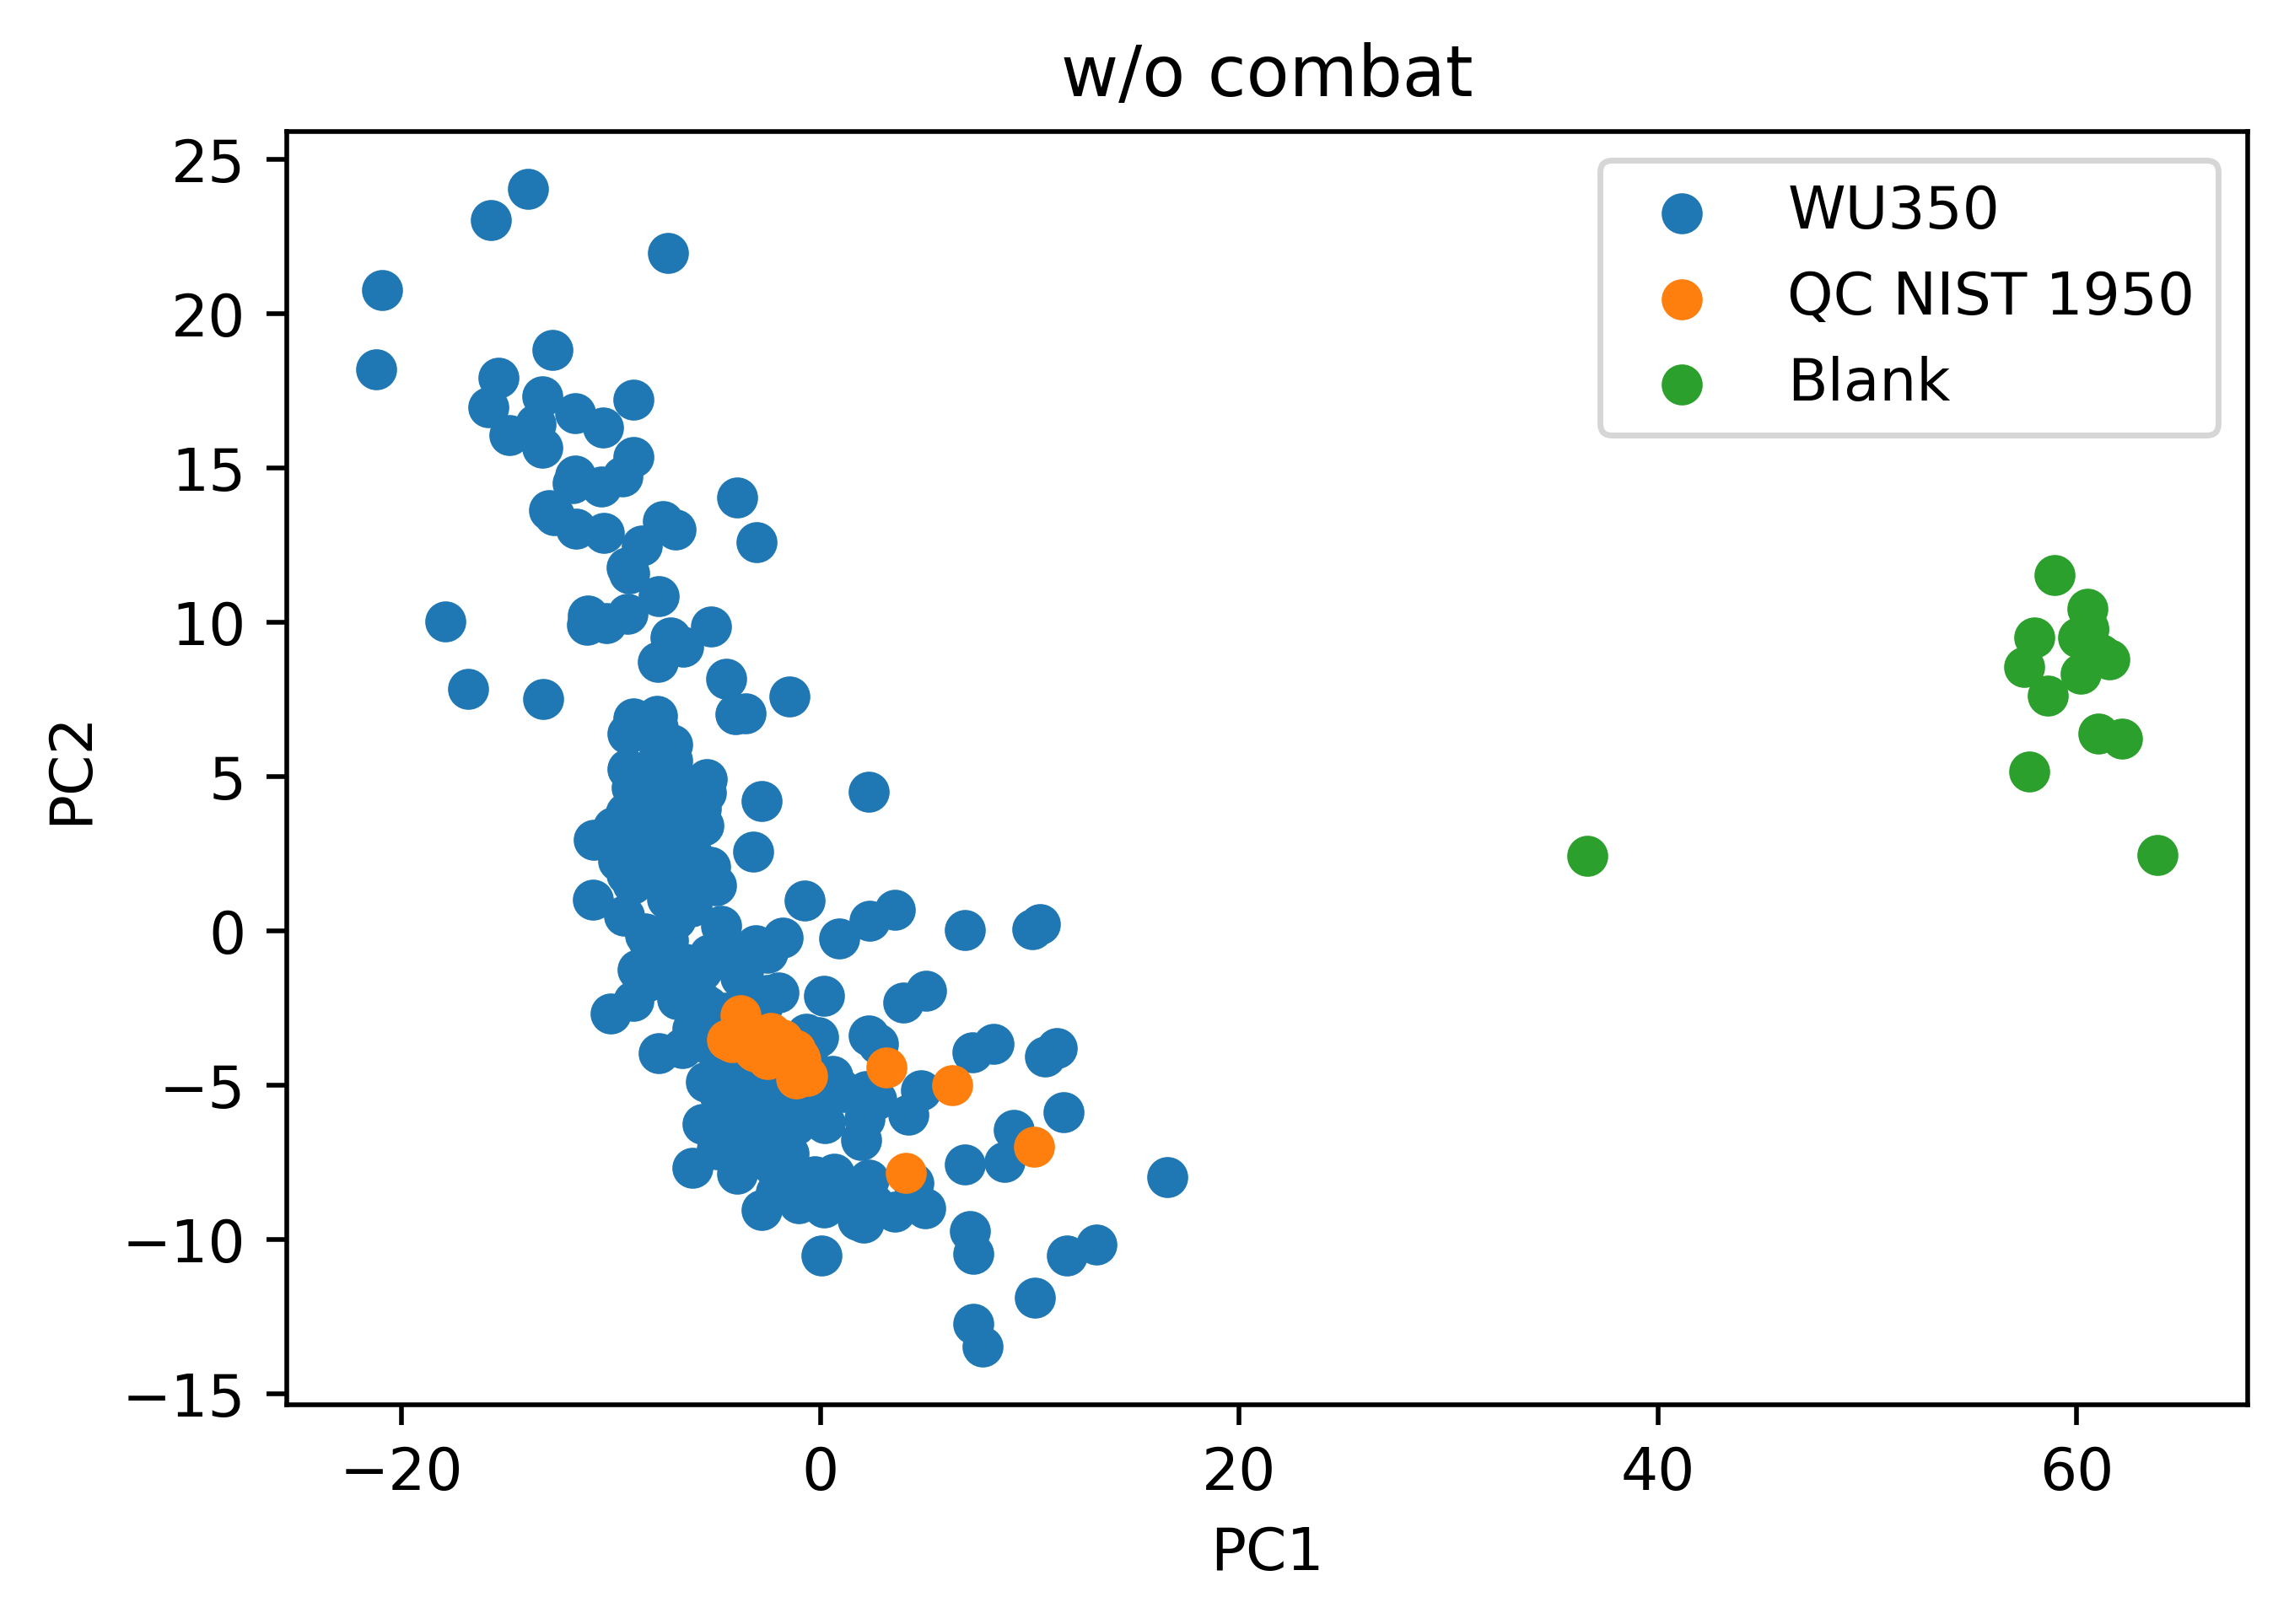

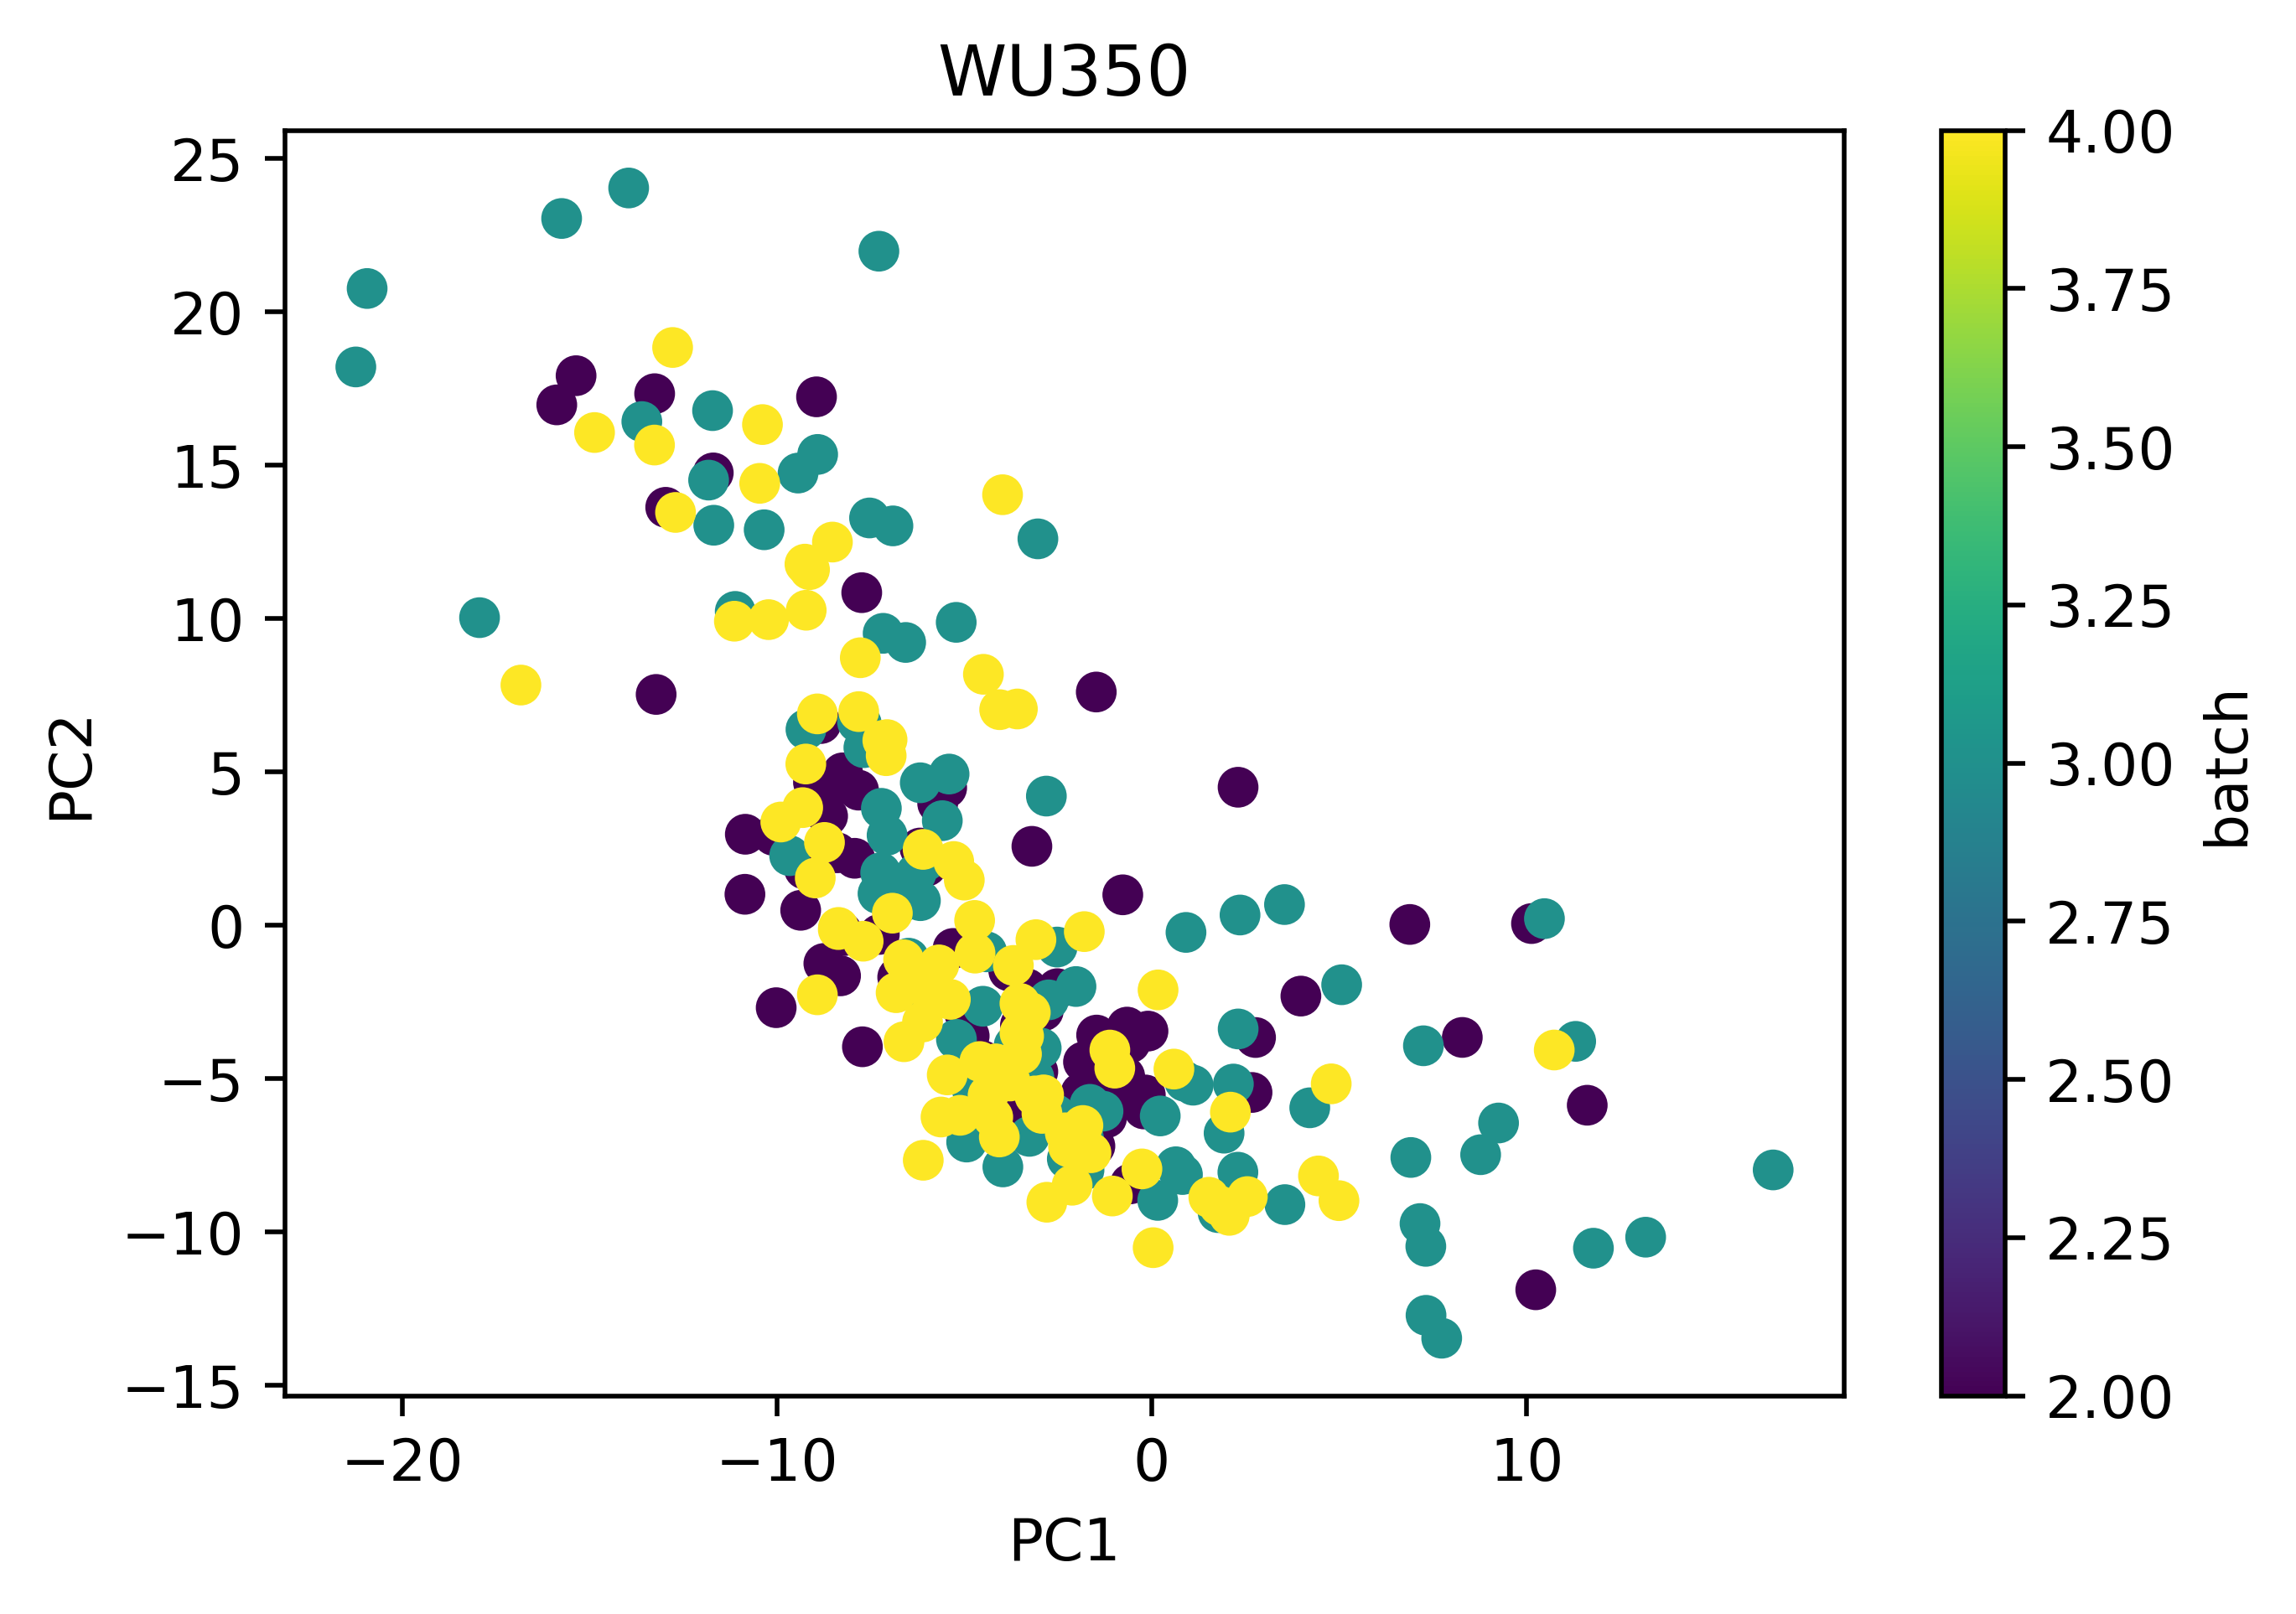

<Figure size 3000x2000 with 0 Axes>

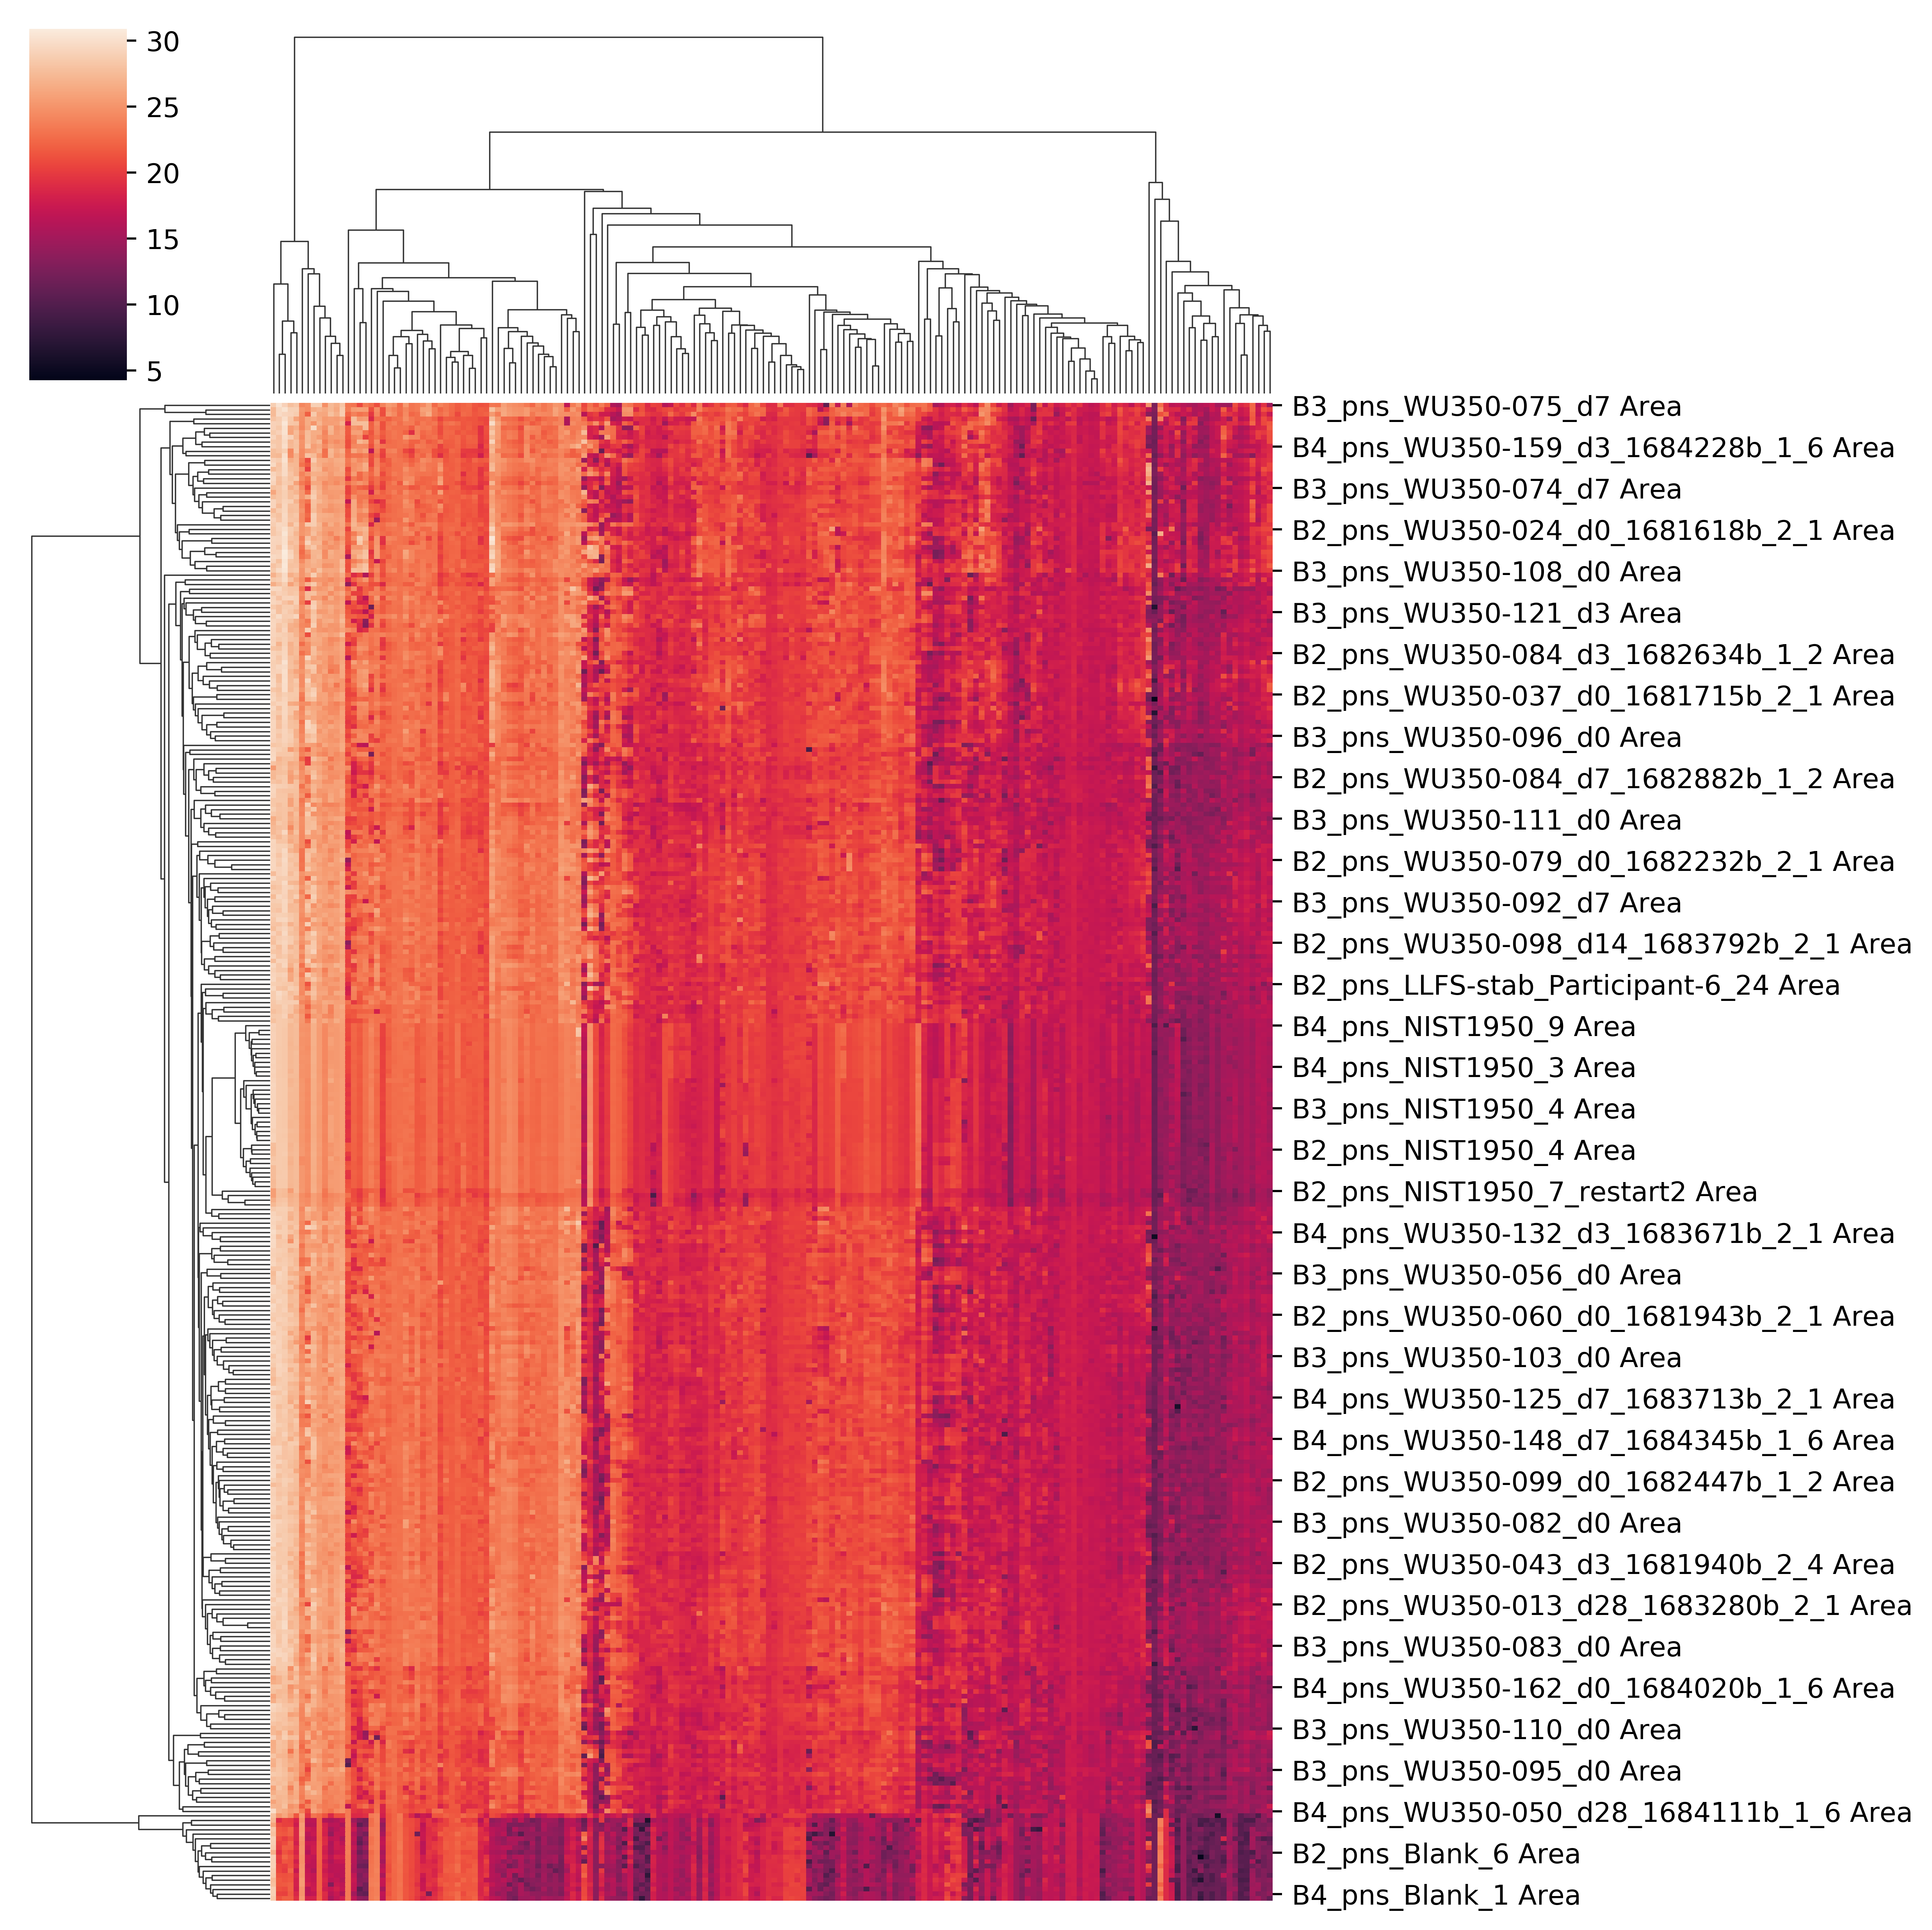

In [36]:
pca = PCA(n_components=2)
pca.fit(data_imp)
data_reduced = pca.transform(data_imp)
plt.scatter(data_reduced[sampCols,0],data_reduced[sampCols,1],label="WU350")
plt.scatter(data_reduced[qcSamp,0],data_reduced[qcSamp,1],label="QC NIST 1950")
plt.scatter(data_reduced[blankSamp,0],data_reduced[blankSamp,1],label="Blank")
plt.legend()

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("w/o combat")

plt.figure()
plt.scatter(data_reduced[sampCols,0],data_reduced[sampCols,1],c=[batchInfo[x] for x in sampCols])
plt.colorbar(label="batch")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("WU350")

plt.figure()
sb.clustermap(pd.DataFrame(data=data_imp,index=areaCols,columns=data["Molecule Name"].values),xticklabels=False)


In [38]:
metadata = pd.read_csv("experiment_parameters.csv")
samp2rowMap = {r.split()[0].replace("pns_","p"):i for r,i in zip(areaCols,range(len(areaCols)))}
row2Samp = {val:key for key,val in samp2rowMap.items()}
print(samp2rowMap)

{'B2_pBlank_1': 0, 'B2_pBlank_2': 1, 'B2_pBlank_3': 2, 'B2_pBlank_4': 3, 'B2_pBlank_5': 4, 'B2_pBlank_6': 5, 'B2_pBlank_7': 6, 'B2_pLLFS-stab_Participant-4_24': 7, 'B2_pLLFS-stab_Participant-5_24': 8, 'B2_pLLFS-stab_Participant-6_24': 9, 'B2_pNIST1950_0': 10, 'B2_pNIST1950_1': 11, 'B2_pNIST1950_2': 12, 'B2_pNIST1950_3': 13, 'B2_pNIST1950_4': 14, 'B2_pNIST1950_5': 15, 'B2_pNIST1950_6': 16, 'B2_pNIST1950_7': 17, 'B2_pNIST1950_7_b': 18, 'B2_pNIST1950_7_restart1': 19, 'B2_pNIST1950_7_restart2': 20, 'B2_pNIST1950_8': 21, 'B2_pNIST1950_equil1': 22, 'B2_pNIST1950_equil2': 23, 'B2_pWU350-012_d28_1683464b_2_1': 24, 'B2_pWU350-013_d28_1683280b_2_1': 25, 'B2_pWU350-015_d0_1681582b_2_1': 26, 'B2_pWU350-015_d3_1681681b_2_2': 27, 'B2_pWU350-015_d7_1681802b_2_1': 28, 'B2_pWU350-016_d0_1681569b_2_1': 29, 'B2_pWU350-017_d0_1681579b_2_1': 30, 'B2_pWU350-018_d0_1681576b_2_1': 31, 'B2_pWU350-018_d0_1681576b_2_1_b': 32, 'B2_pWU350-019_d0_1681566b_2_1': 33, 'B2_pWU350-020_d0_1681585b_2_1': 34, 'B2_pWU350-02

Text(0, 0.5, 'PC2')

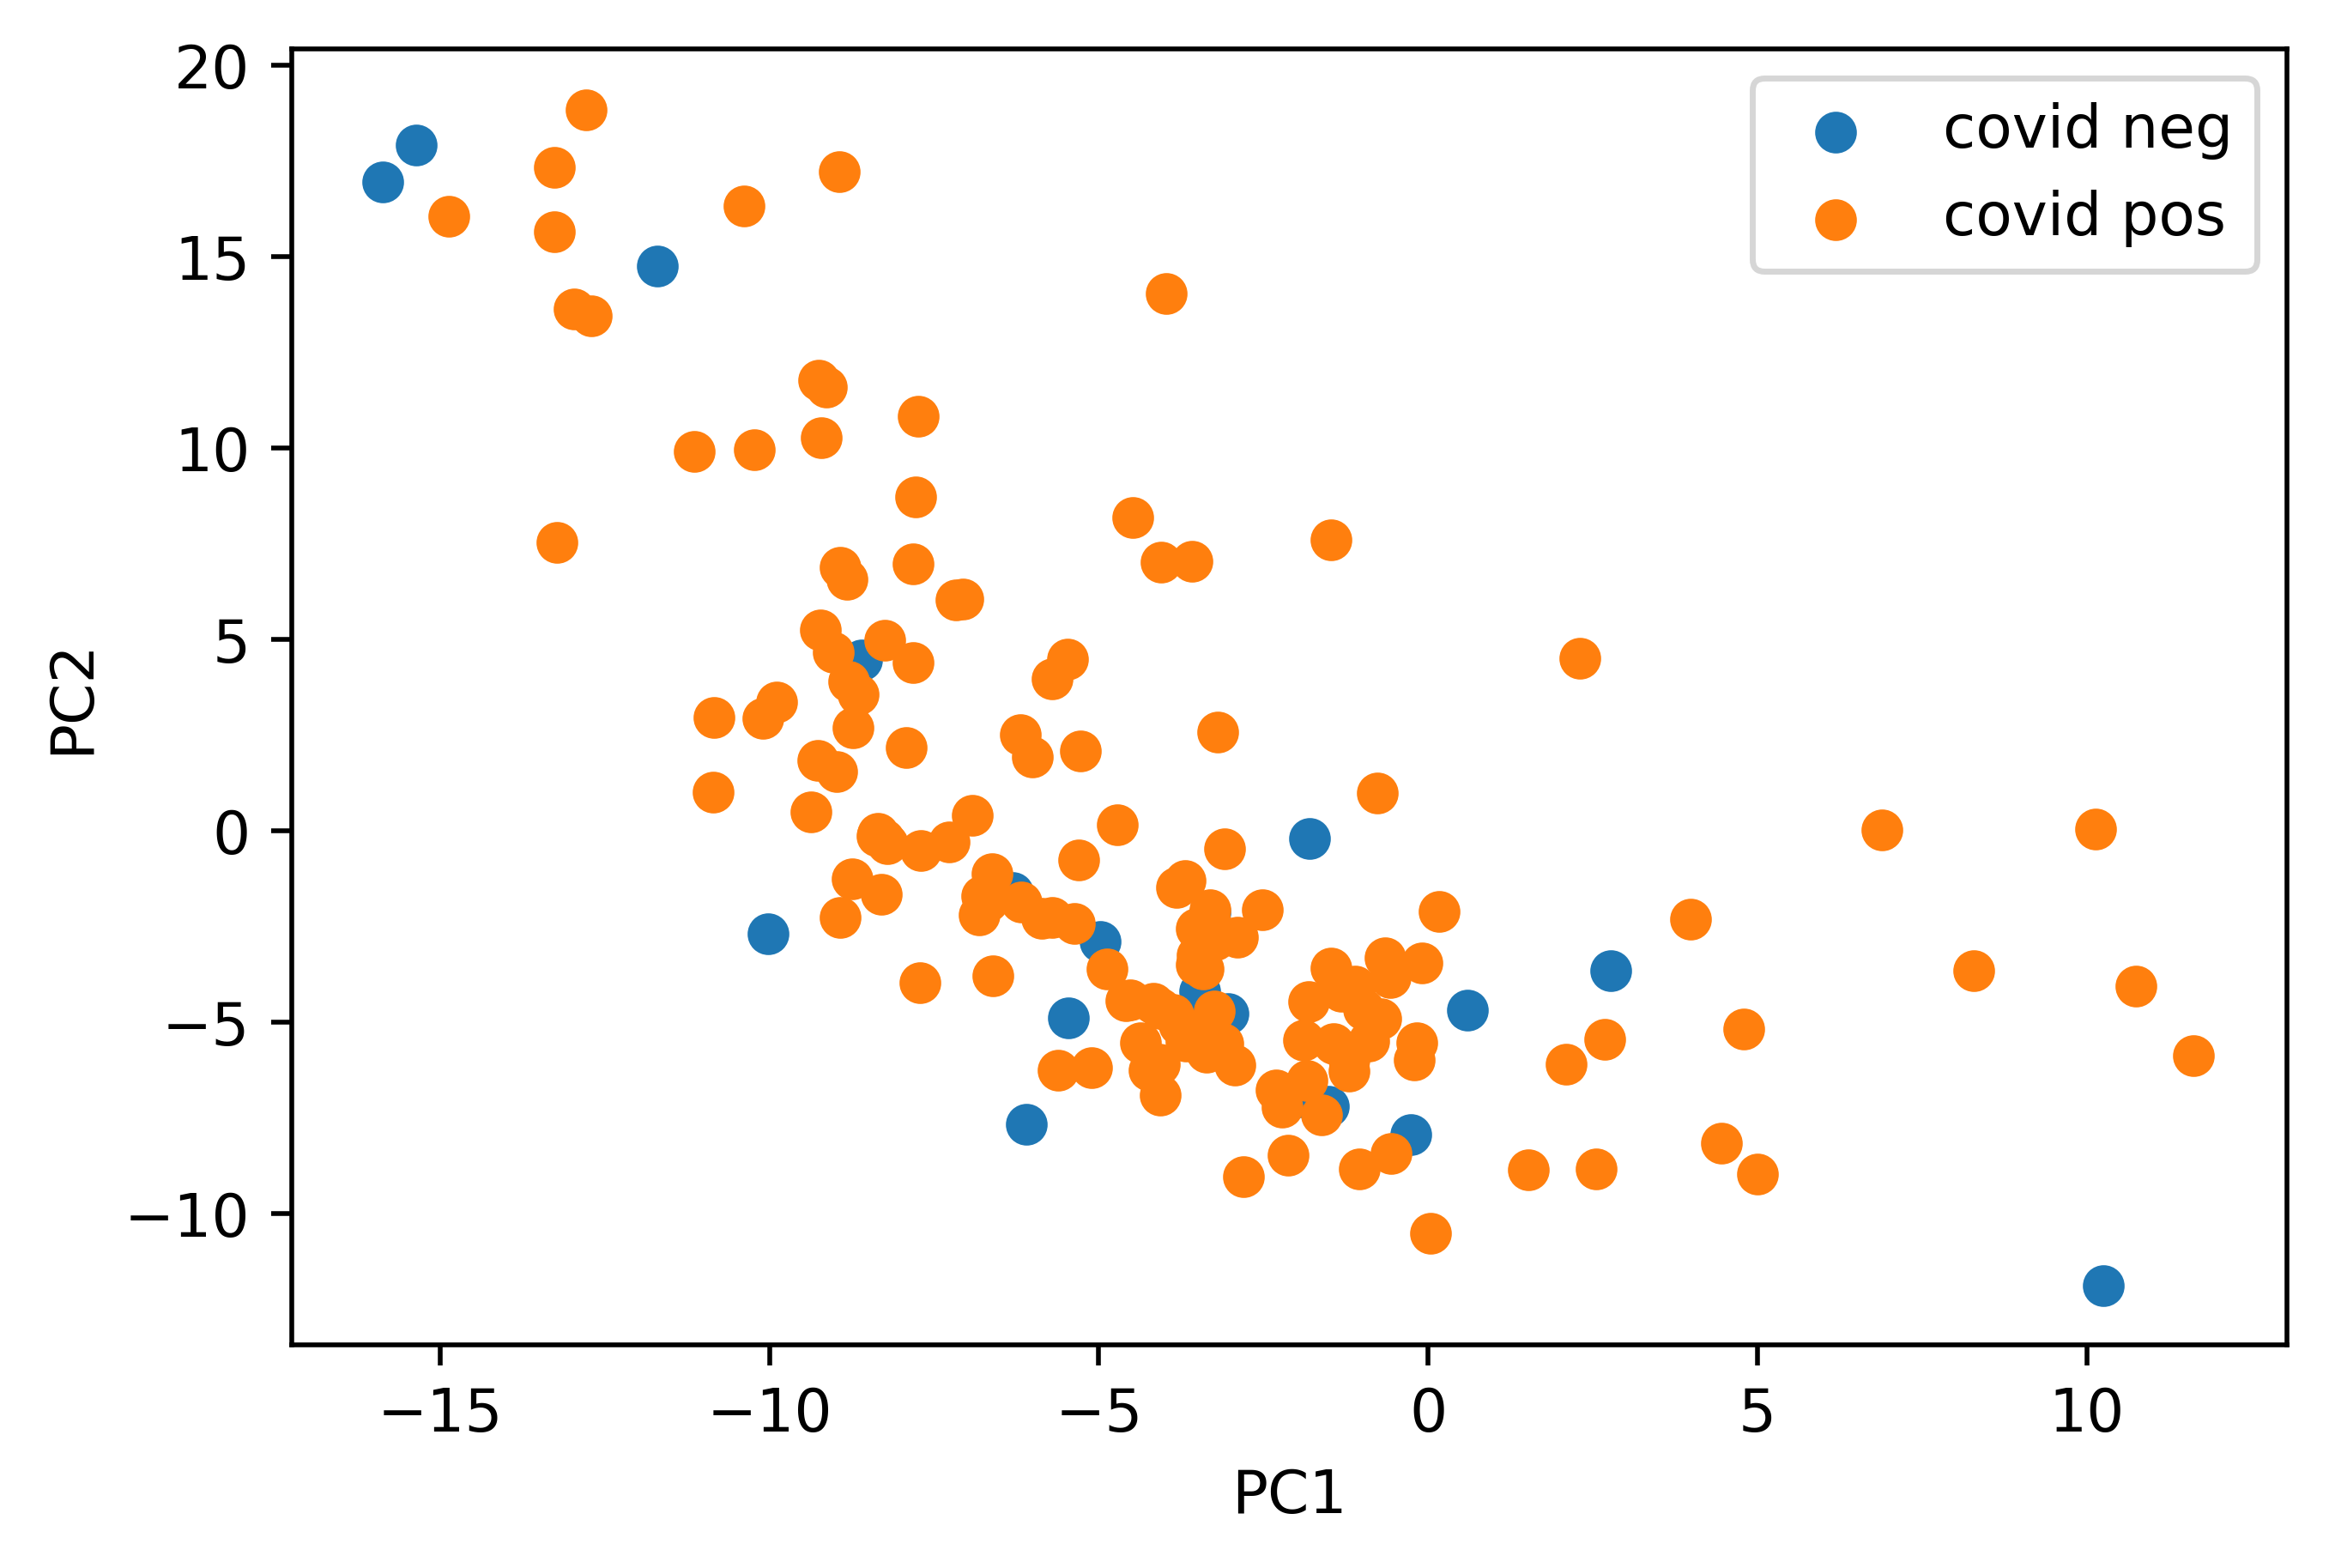

In [39]:
covid_initial_status_neg = [samp2rowMap[row["Sample"]] for index,row in metadata.iterrows() if row["Sample"] in samp2rowMap and "No" in str(row["day-COVID"])]
covid_initial_status_pos = [samp2rowMap[row["Sample"]] for index,row in metadata.iterrows() if row["Sample"] in samp2rowMap and "Yes" in str(row["day-COVID"])]

plt.scatter(data_reduced[covid_initial_status_neg,0],data_reduced[covid_initial_status_neg,1],label="covid neg")
plt.scatter(data_reduced[covid_initial_status_pos,0],data_reduced[covid_initial_status_pos,1],label="covid pos")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")


In [40]:
numMets = len(blankData[0])
pvalCutoff = 0.05
pval_corr = pvalCutoff/numMets
goodMets = []
for met in range(numMets):
    b = blankData[:,met]
    s = sampData[:,met]
    t,p = stats.ttest_ind(b,s,equal_var=False)
    if p < pval_corr:
        goodMets.append(met)

training error:  0.1534090909090909
[[ 15   0]
 [ 27 134]]
testing error:  0.19318181818181818
[[ 4  0]
 [17 67]]


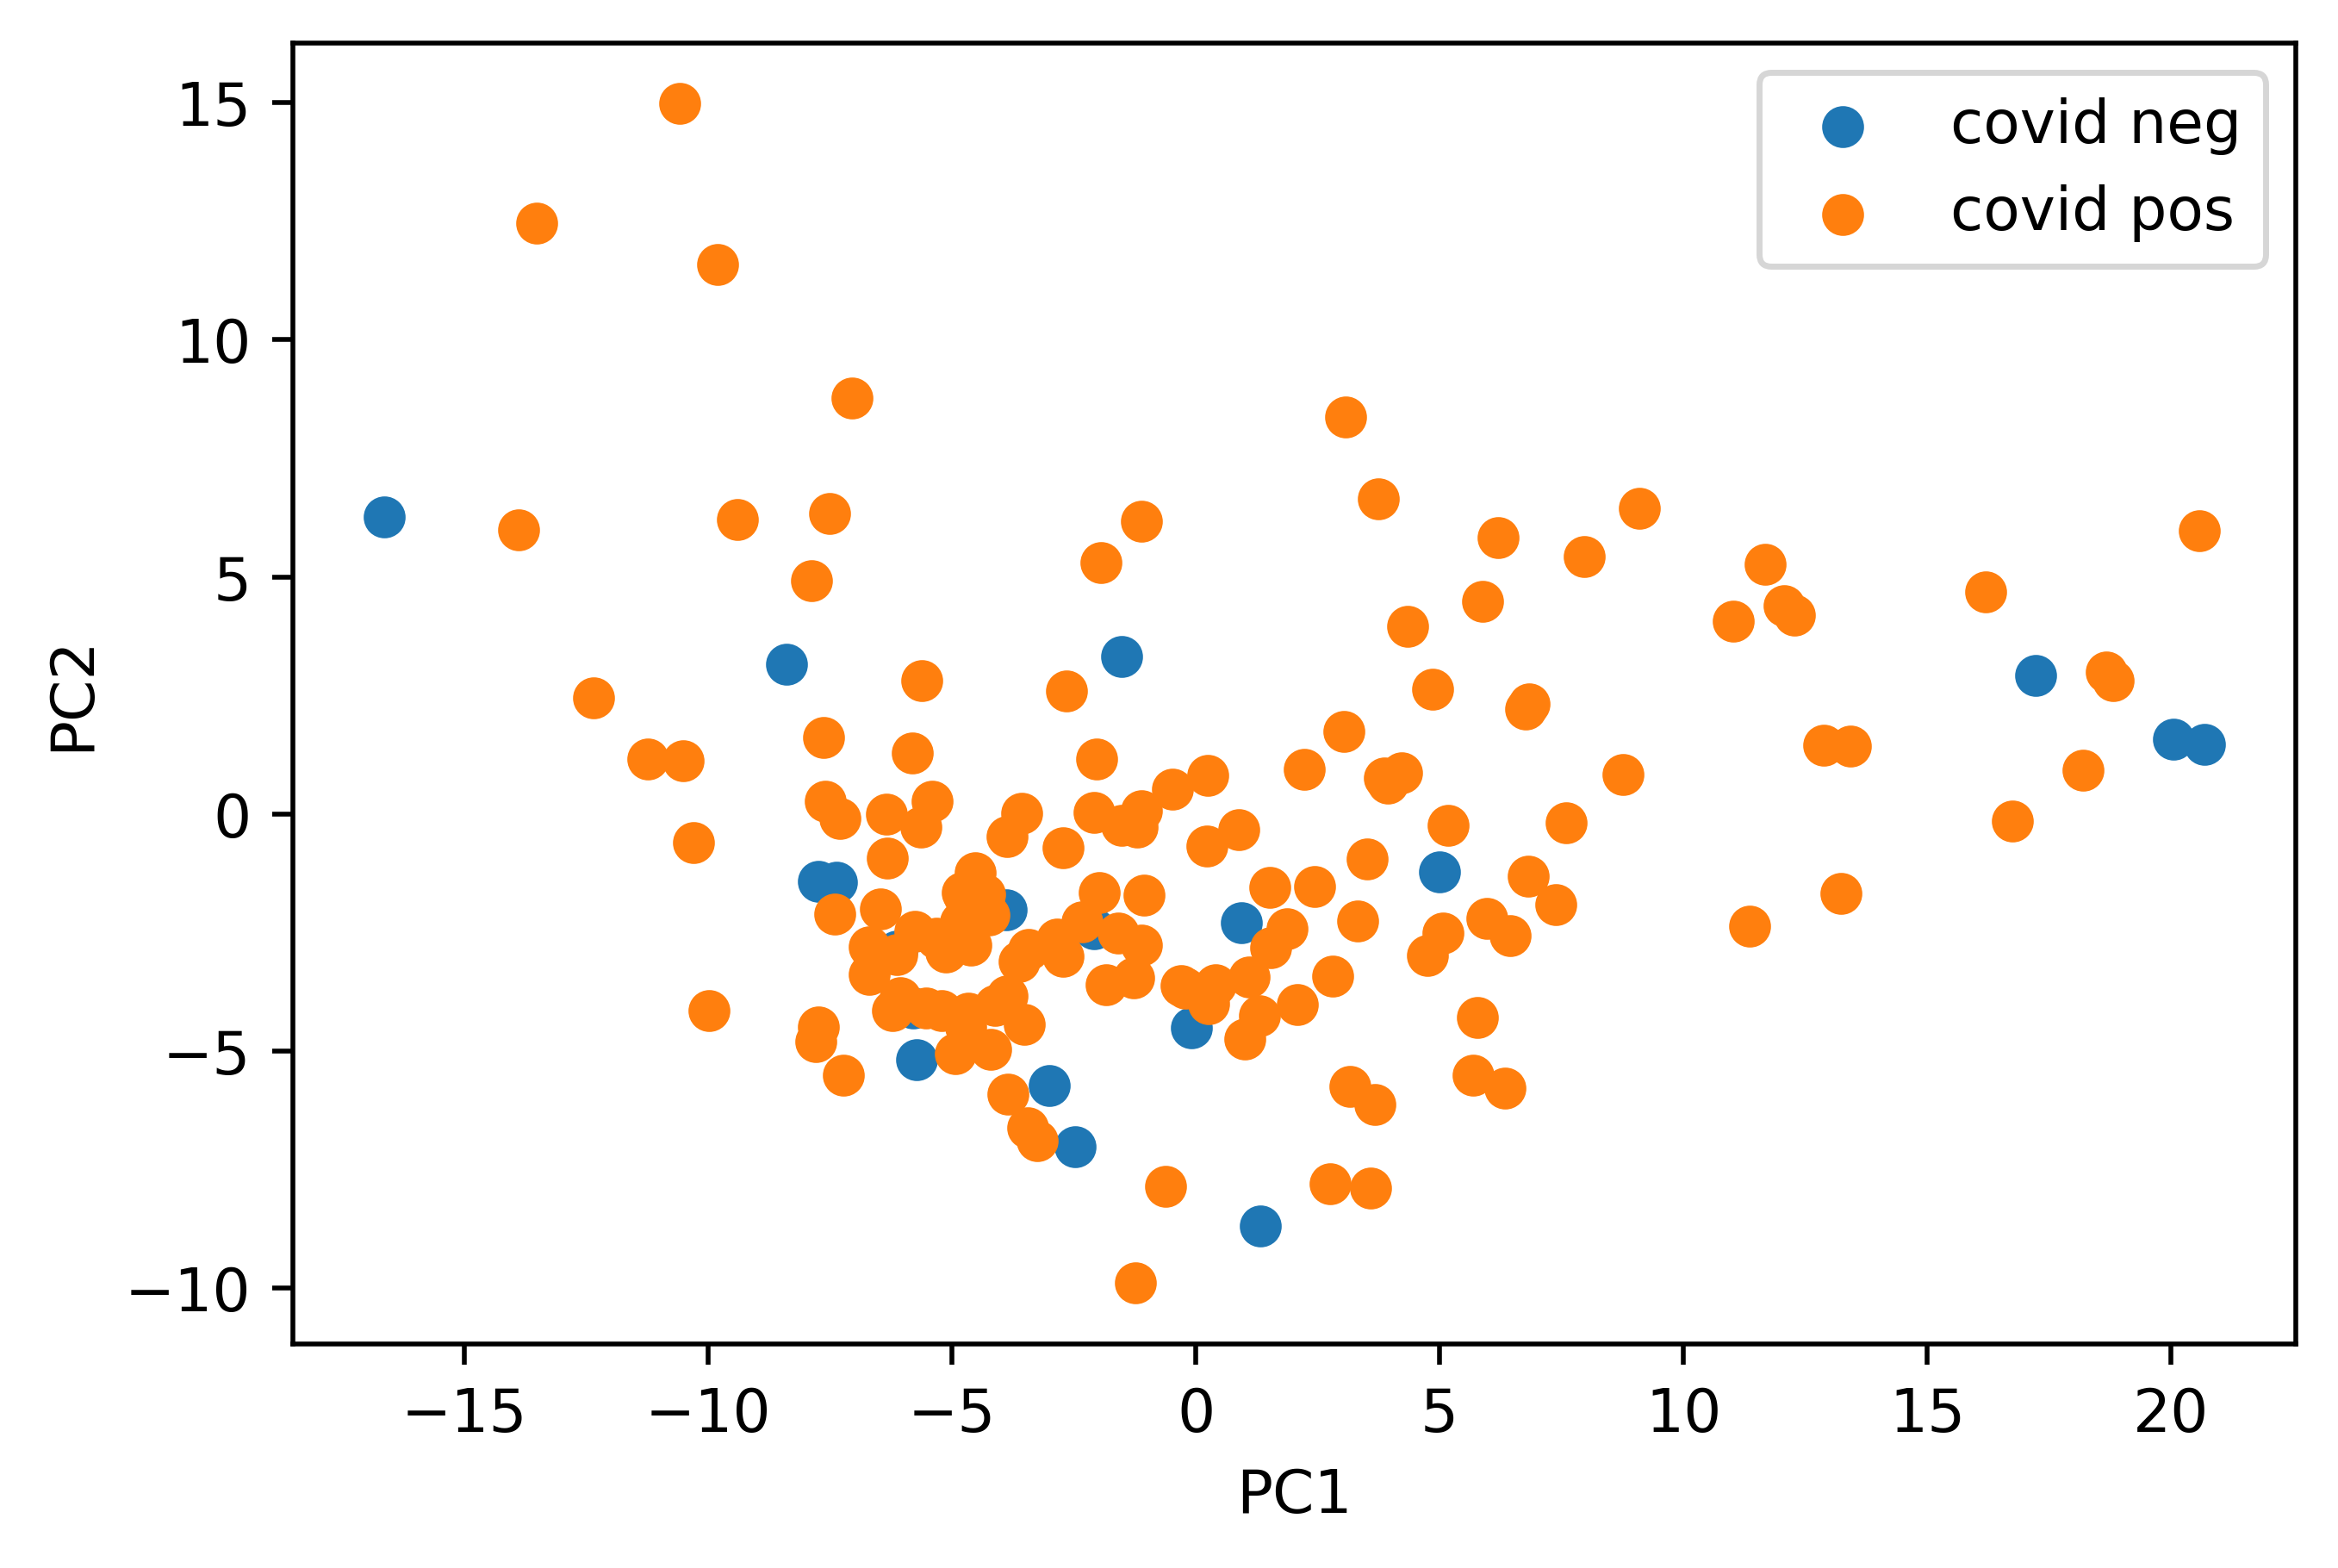

<Figure size 3000x2000 with 0 Axes>

In [41]:
sampData_sig = sampData[:,goodMets]
pca = PCA(n_components=2)
pca.fit(sampData_sig)
data_reduced = pca.transform(sampData_sig)

covid_initial_status_neg = [sampCols.index(samp2rowMap[row["Sample"]]) for index,row in metadata.iterrows() if row["Sample"] in samp2rowMap and "No" in str(row["day-COVID"])]
covid_initial_status_pos = [sampCols.index(samp2rowMap[row["Sample"]]) for index,row in metadata.iterrows() if row["Sample"] in samp2rowMap and "Yes" in str(row["day-COVID"])]


covid_status = [1 for x in range(len(sampData_sig))]
for ind in covid_initial_status_neg:
    covid_status[ind] = -1

plt.scatter(data_reduced[covid_initial_status_neg,0],data_reduced[covid_initial_status_neg,1],label="covid neg")
plt.scatter(data_reduced[covid_initial_status_pos,0],data_reduced[covid_initial_status_pos,1],label="covid pos")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.figure()

sampData_sig = np.concatenate((sampData_sig,np.ones((len(sampData_sig),1))),axis=1)
X_train,X_test,y_train,y_test = train_test_split(sampData_sig,covid_status,random_state=0,test_size=.33)
weightNeg = .5/len([y for y in y_train if y == -1])
weightPos = .5/len([y for y in y_train if y == 1])
sampleWeights = [weightNeg for x in y_train]
for x in range(len(y_train)):
    if y_train[x] == 1:
        sampleWeights[x] = weightPos
        

reg = LogisticRegression(fit_intercept=False,max_iter=1e3)
reg.fit(X_train,y_train,sample_weight=sampleWeights)
y_train_pred = reg.predict(X_train)
err_train = float(len([t for p,t in zip(y_train_pred,y_train) if p != t]))/len(y_train)
print("training error: ",err_train)
cnf_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_pred)
print(cnf_matrix)
y_test_pred = reg.predict(X_test)
err_test = float(len([t for p,t in zip(y_test_pred,y_test) if p != t]))/len(y_test)
print("testing error: ",err_test)
cnf_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_pred)
print(cnf_matrix)

training error:  0.005681818181818182
testing error:  0.26136363636363635
[[ 4 13]
 [10 61]]


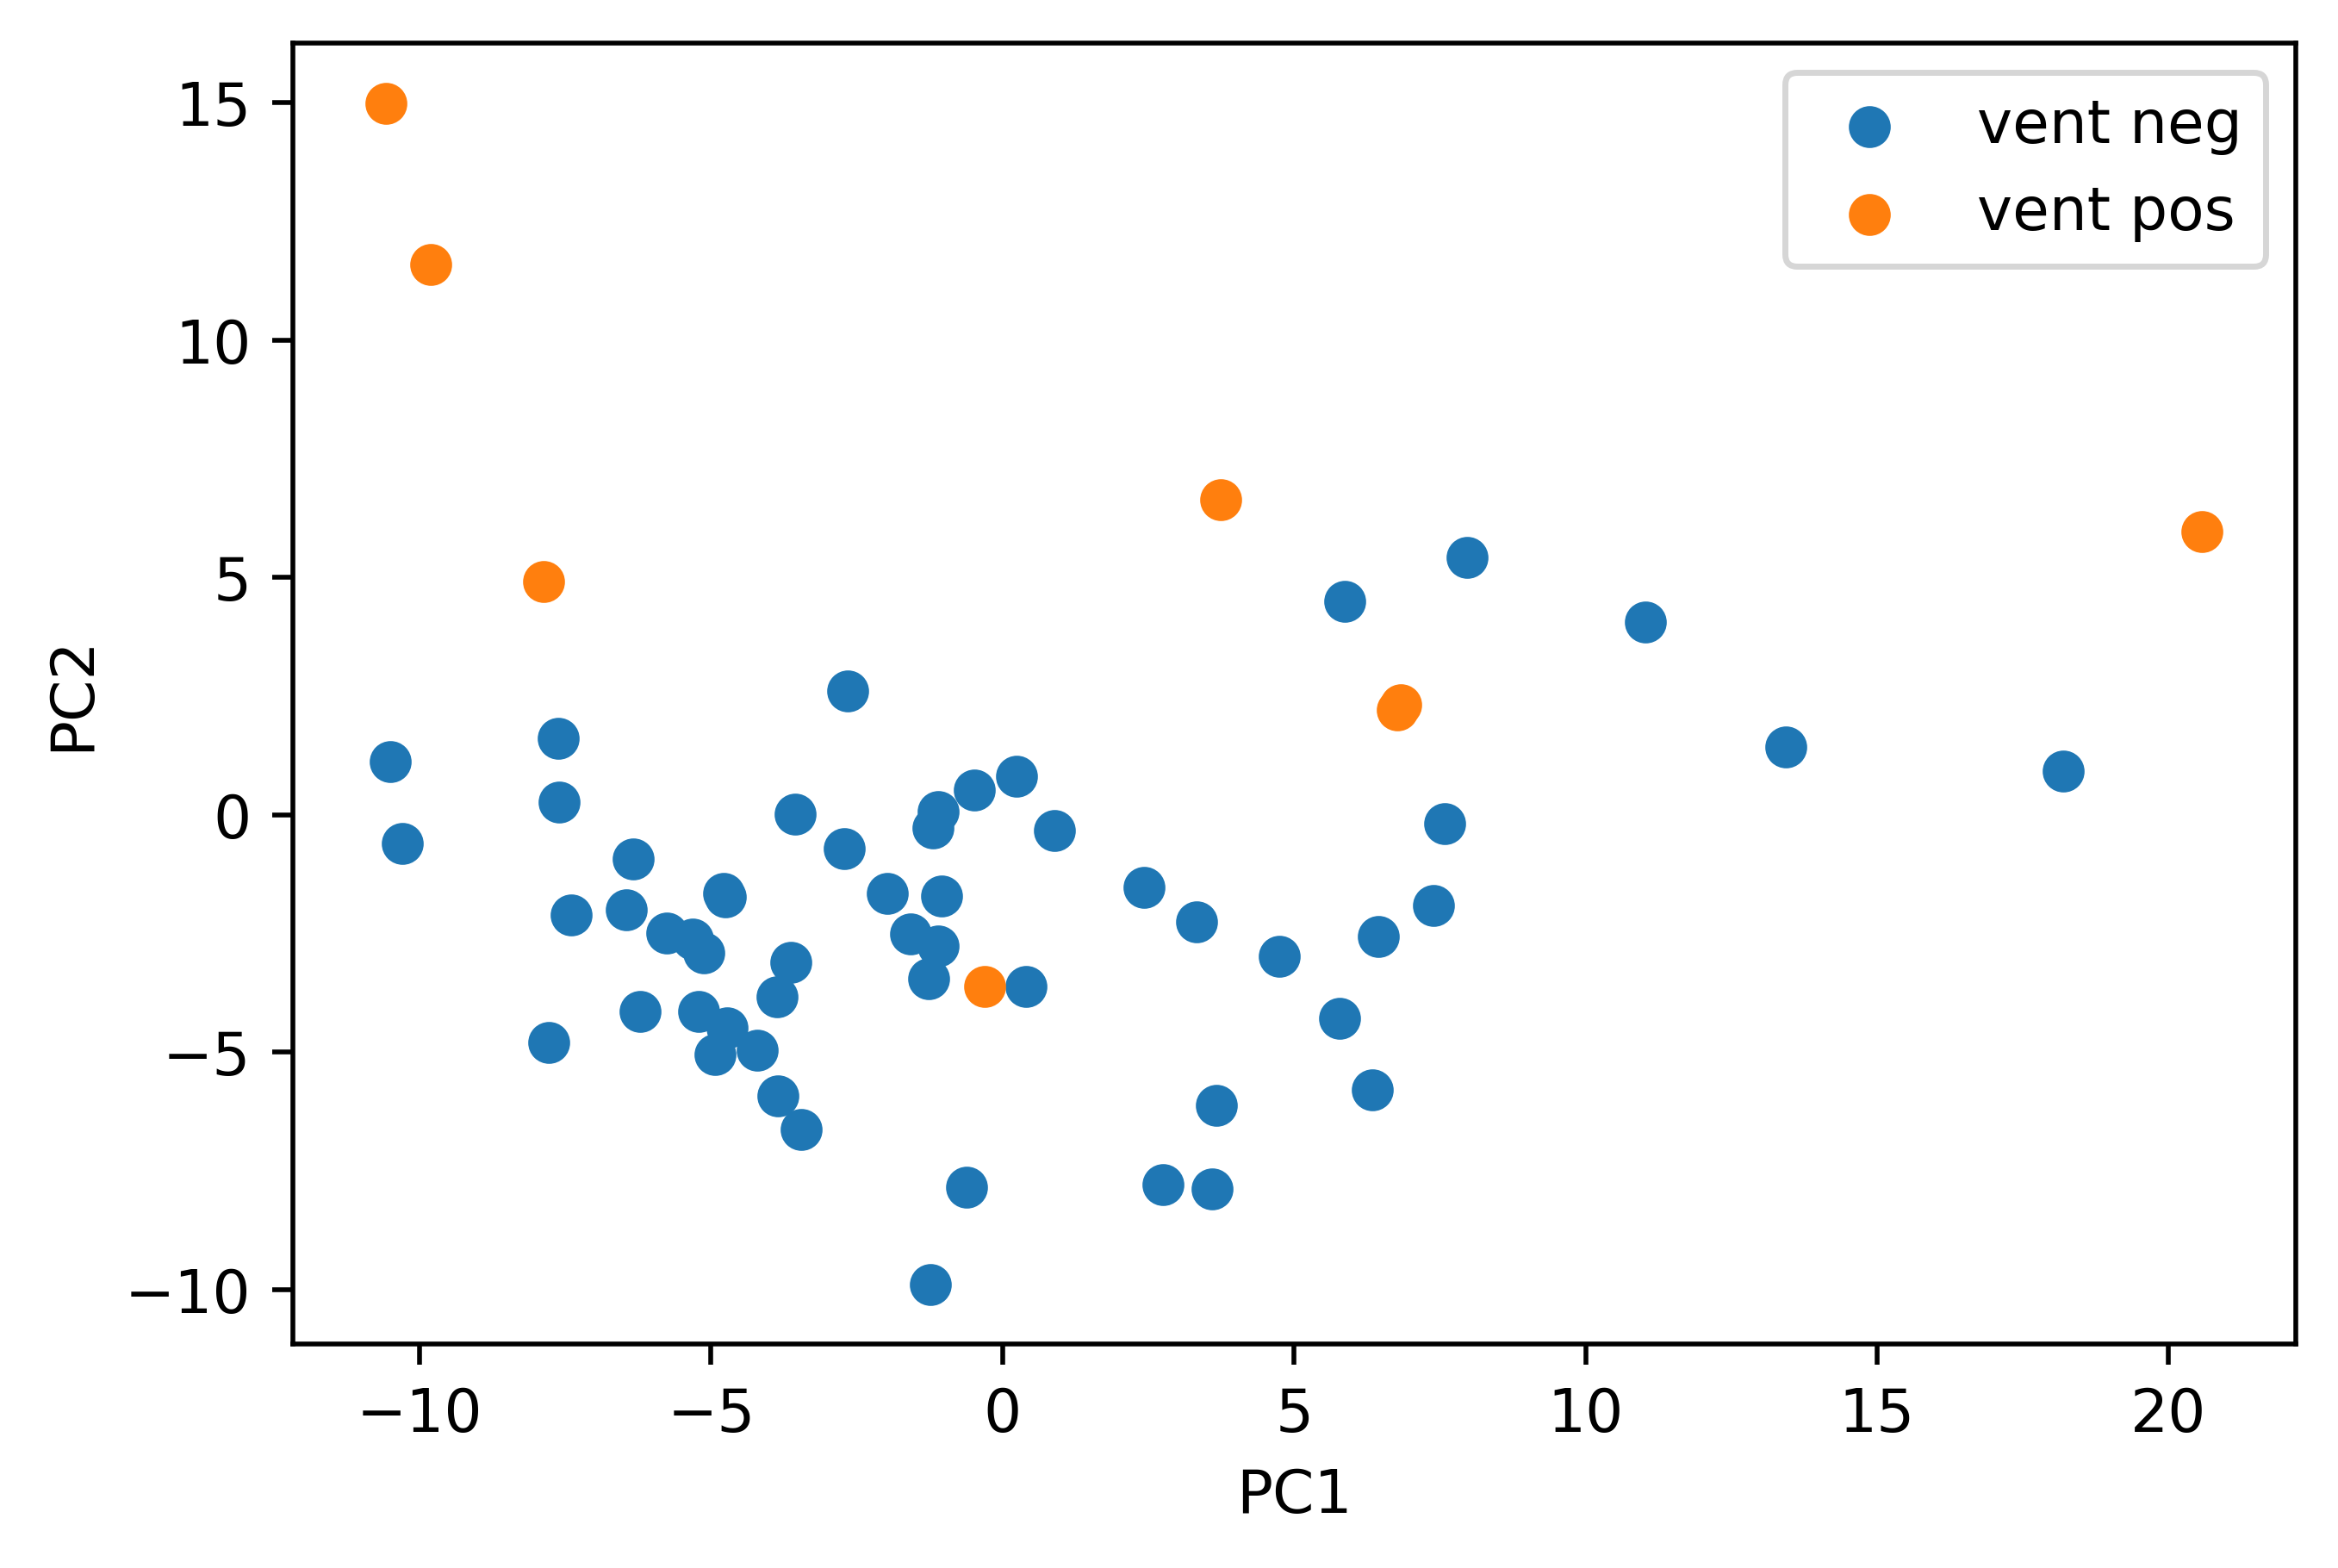

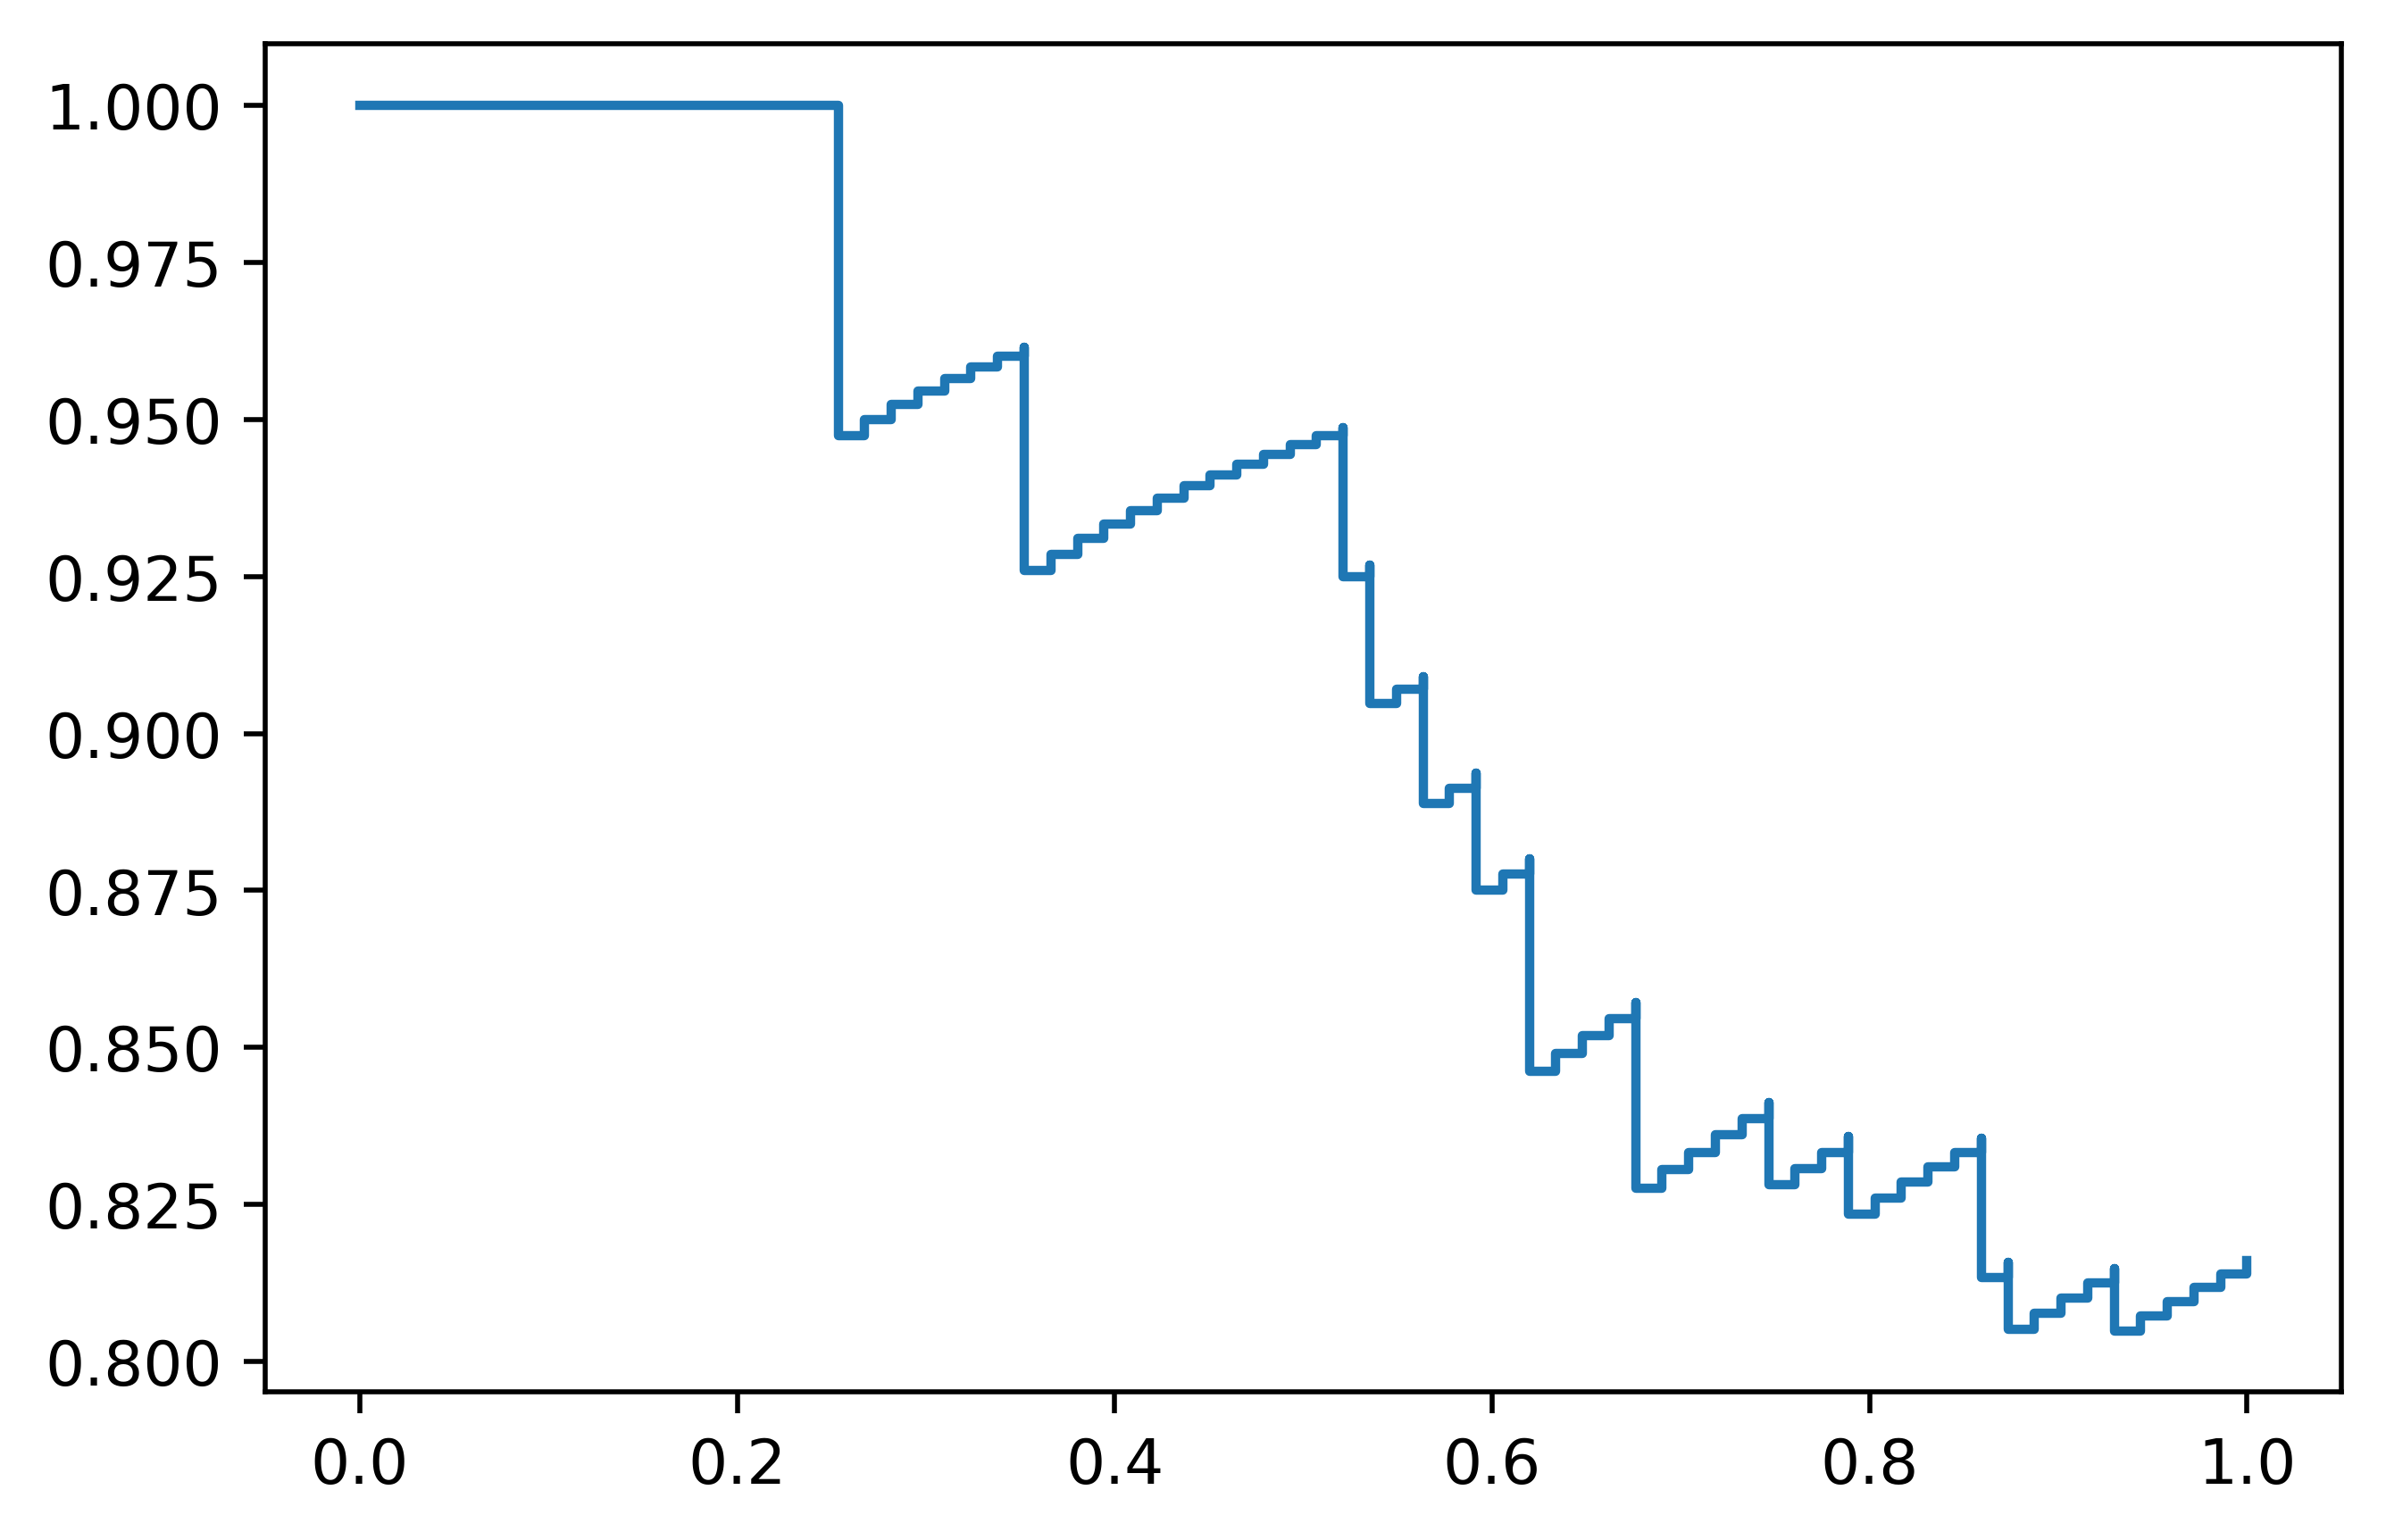

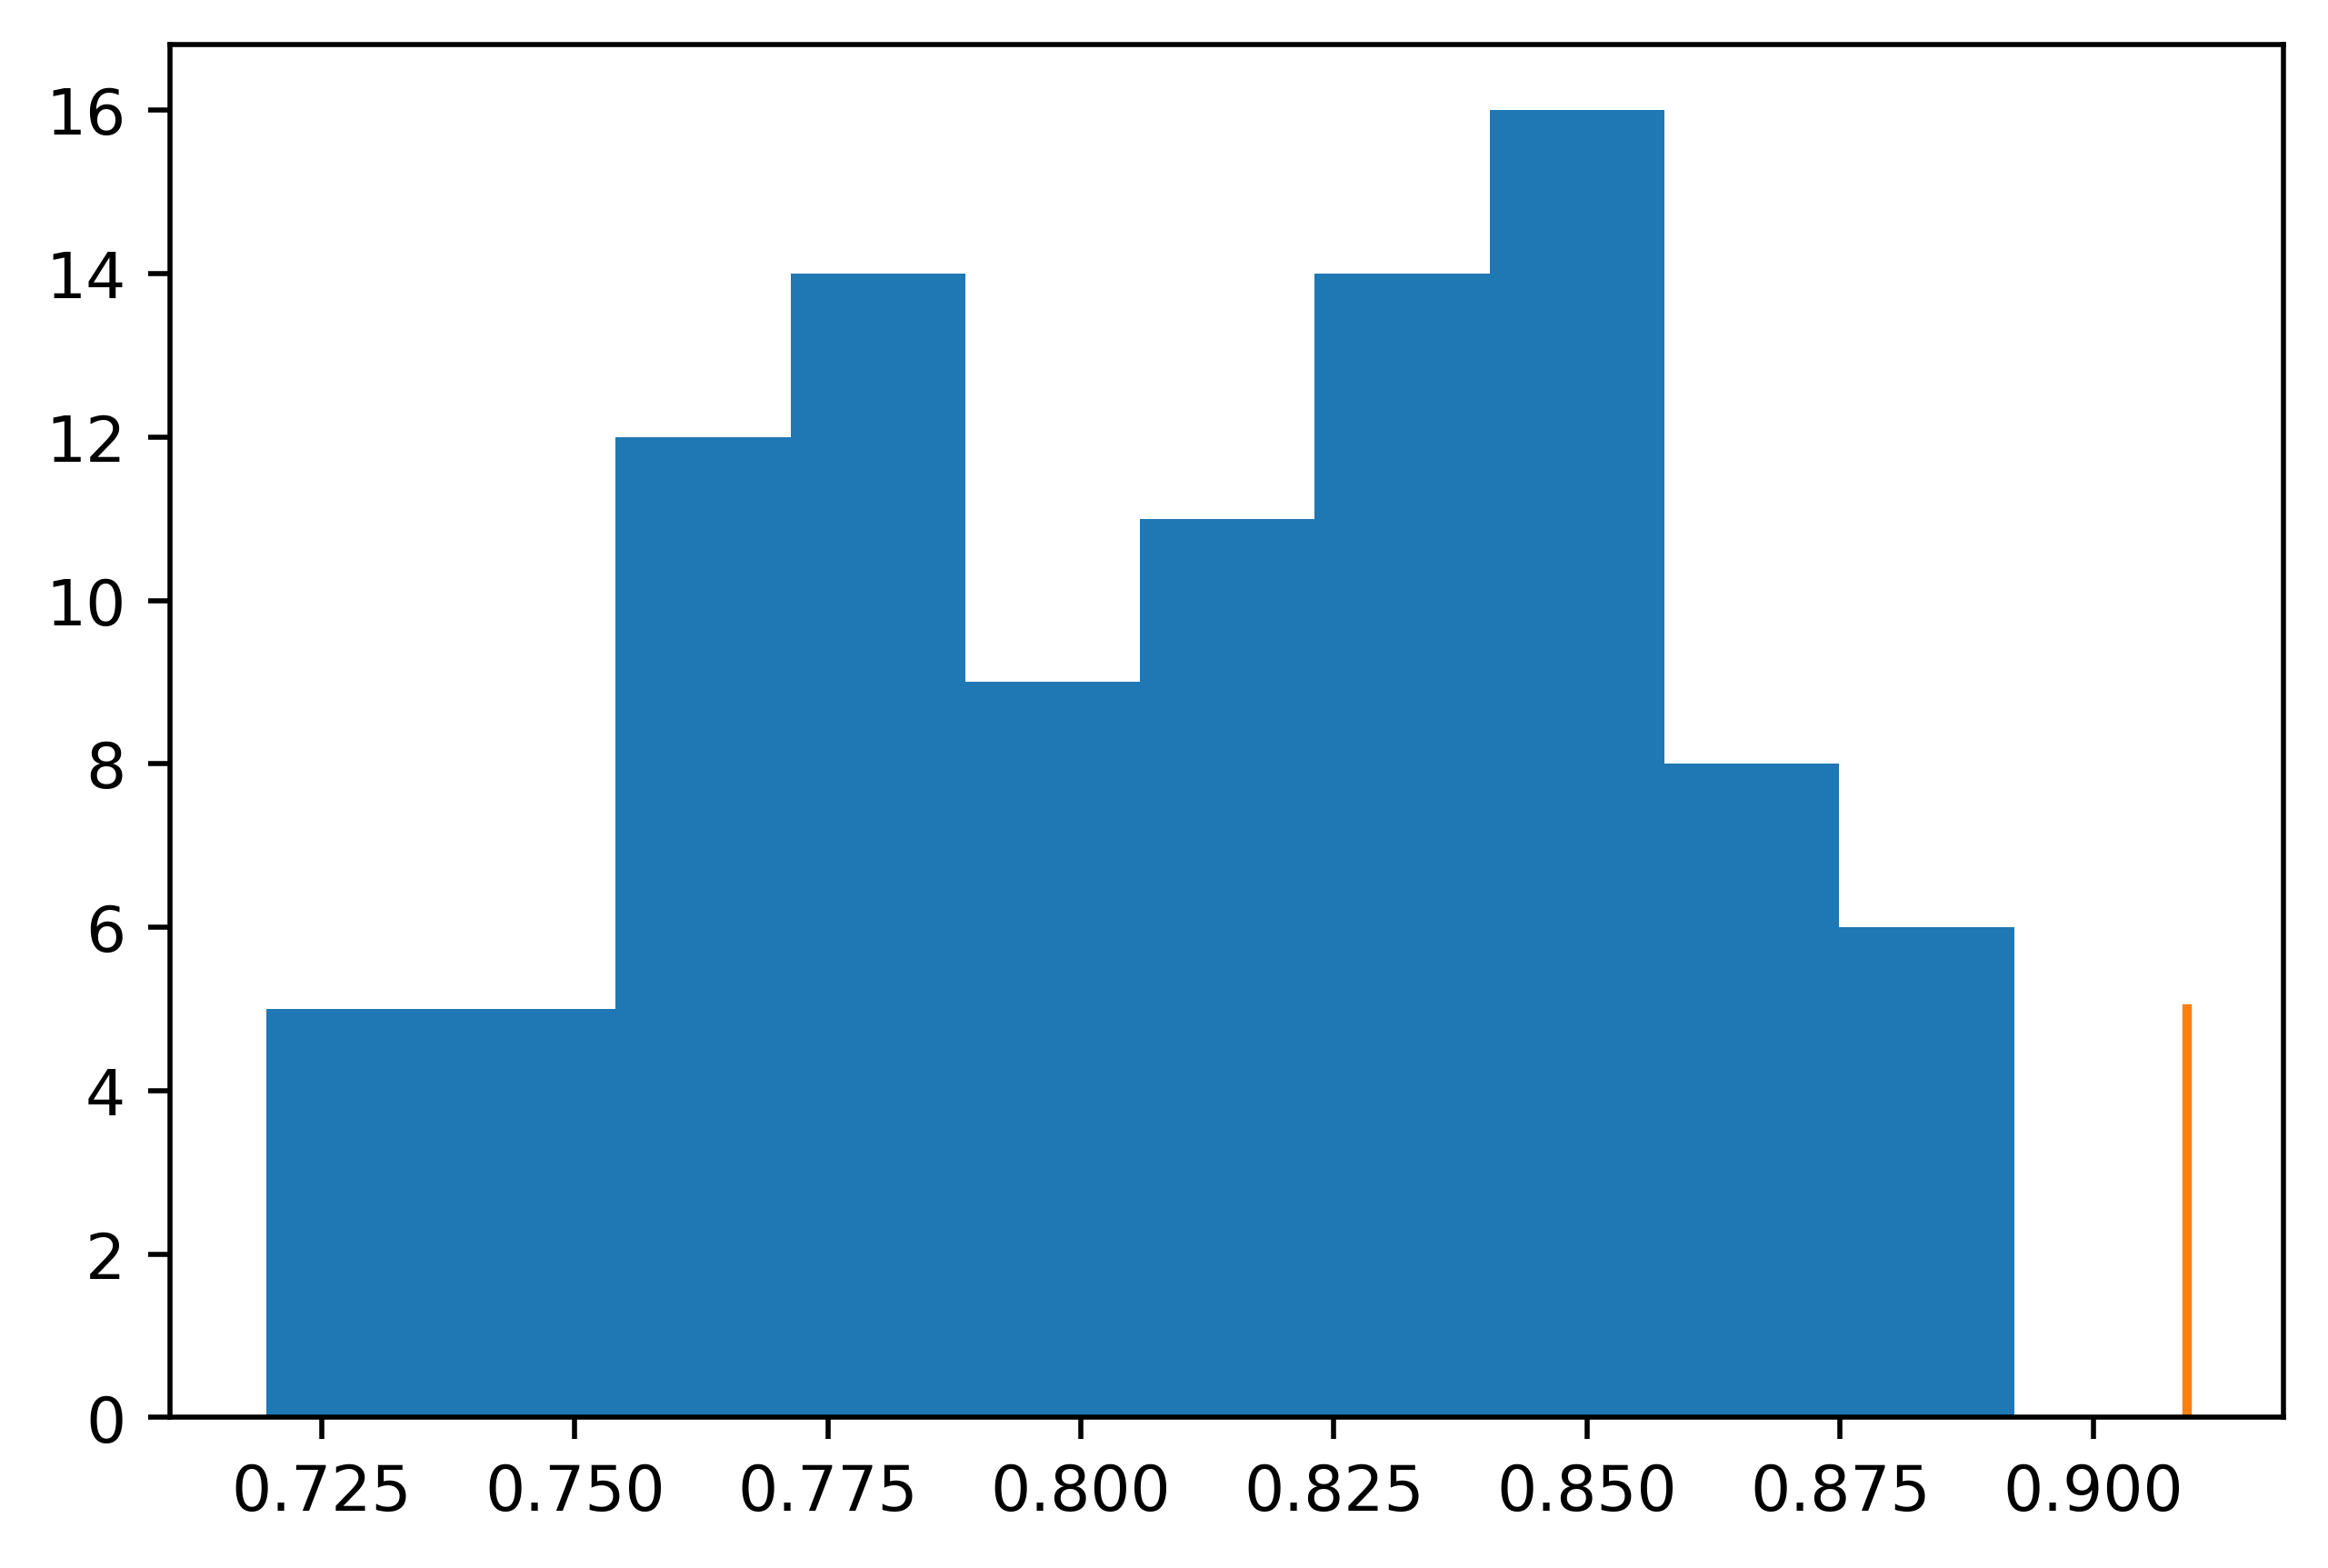

In [56]:
vent_status_neg = [sampCols.index(samp2rowMap[row["Sample"]]) for index,row in metadata.iterrows() if row["Sample"] in samp2rowMap and "No" in str(row["Epic: Subject on ventilation at any point after biospecimen sample 1"]) and "d0_Yes" == row["day-COVID"]]
vent_status_pos = [sampCols.index(samp2rowMap[row["Sample"]]) for index,row in metadata.iterrows() if row["Sample"] in samp2rowMap and "Yes" in str(row["Epic: Subject on ventilation at any point after biospecimen sample 1"]) and "d0_Yes" == row["day-COVID"]]

vent_status = [1 for x in range(len(sampData_sig))]
for ind in vent_status_neg:
    vent_status[ind] = -1

plt.scatter(data_reduced[vent_status_neg,0],data_reduced[vent_status_neg,1],label="vent neg")
plt.scatter(data_reduced[vent_status_pos,0],data_reduced[vent_status_pos,1],label="vent pos")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.figure()

X_train,X_test,y_train,y_test = train_test_split(sampData_sig,vent_status,random_state=0,test_size=.33)

reg = LogisticRegression(fit_intercept=False,max_iter=1e4)

        
weightNeg = .5/len([y for y in y_train if y == -1])
weightPos = .5/len([y for y in y_train if y == 1])
sampleWeights = [weightNeg for x in y_train]
for x in range(len(y_train)):
    if y_train[x] == 1:
        sampleWeights[x] = weightPos
        
reg.fit(X_train,y_train,sample_weight=sampleWeights)

reg.fit(X_train,y_train)

y_train_pred = reg.predict(X_train)
err_train = float(len([t for p,t in zip(y_train_pred,y_train) if p != t]))/len(y_train)
print("training error: ",err_train)
cnf_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_pred)
y_test_pred = reg.predict(X_test)
err_test = float(len([t for p,t in zip(y_test_pred,y_test) if p != t]))/len(y_test)
print("testing error: ",err_test)
cnf_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_pred)
print(cnf_matrix)
y_test_prob = reg.predict_proba(X_test)[:,1]
prec,recall,thres = sklearn.metrics.precision_recall_curve(y_test,y_test_prob)
plt.step(recall,prec)
auc = sklearn.metrics.auc(recall,prec)

plt.figure()
aucs = []
numIters = 100
tempY = list(y_train)
for x in range(numIters):
    rd.shuffle(tempY)
    reg.fit(X_train,tempY)
    temp_pred = reg.predict_proba(X_test)[:,1]
    prec,recall,thres = sklearn.metrics.precision_recall_curve(y_test,temp_pred)
    aucs.append(sklearn.metrics.auc(recall,prec))
plt.hist(aucs)
plt.plot([auc,auc],[0,5])




12


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0, 0.5, 'log2(peakArea)')

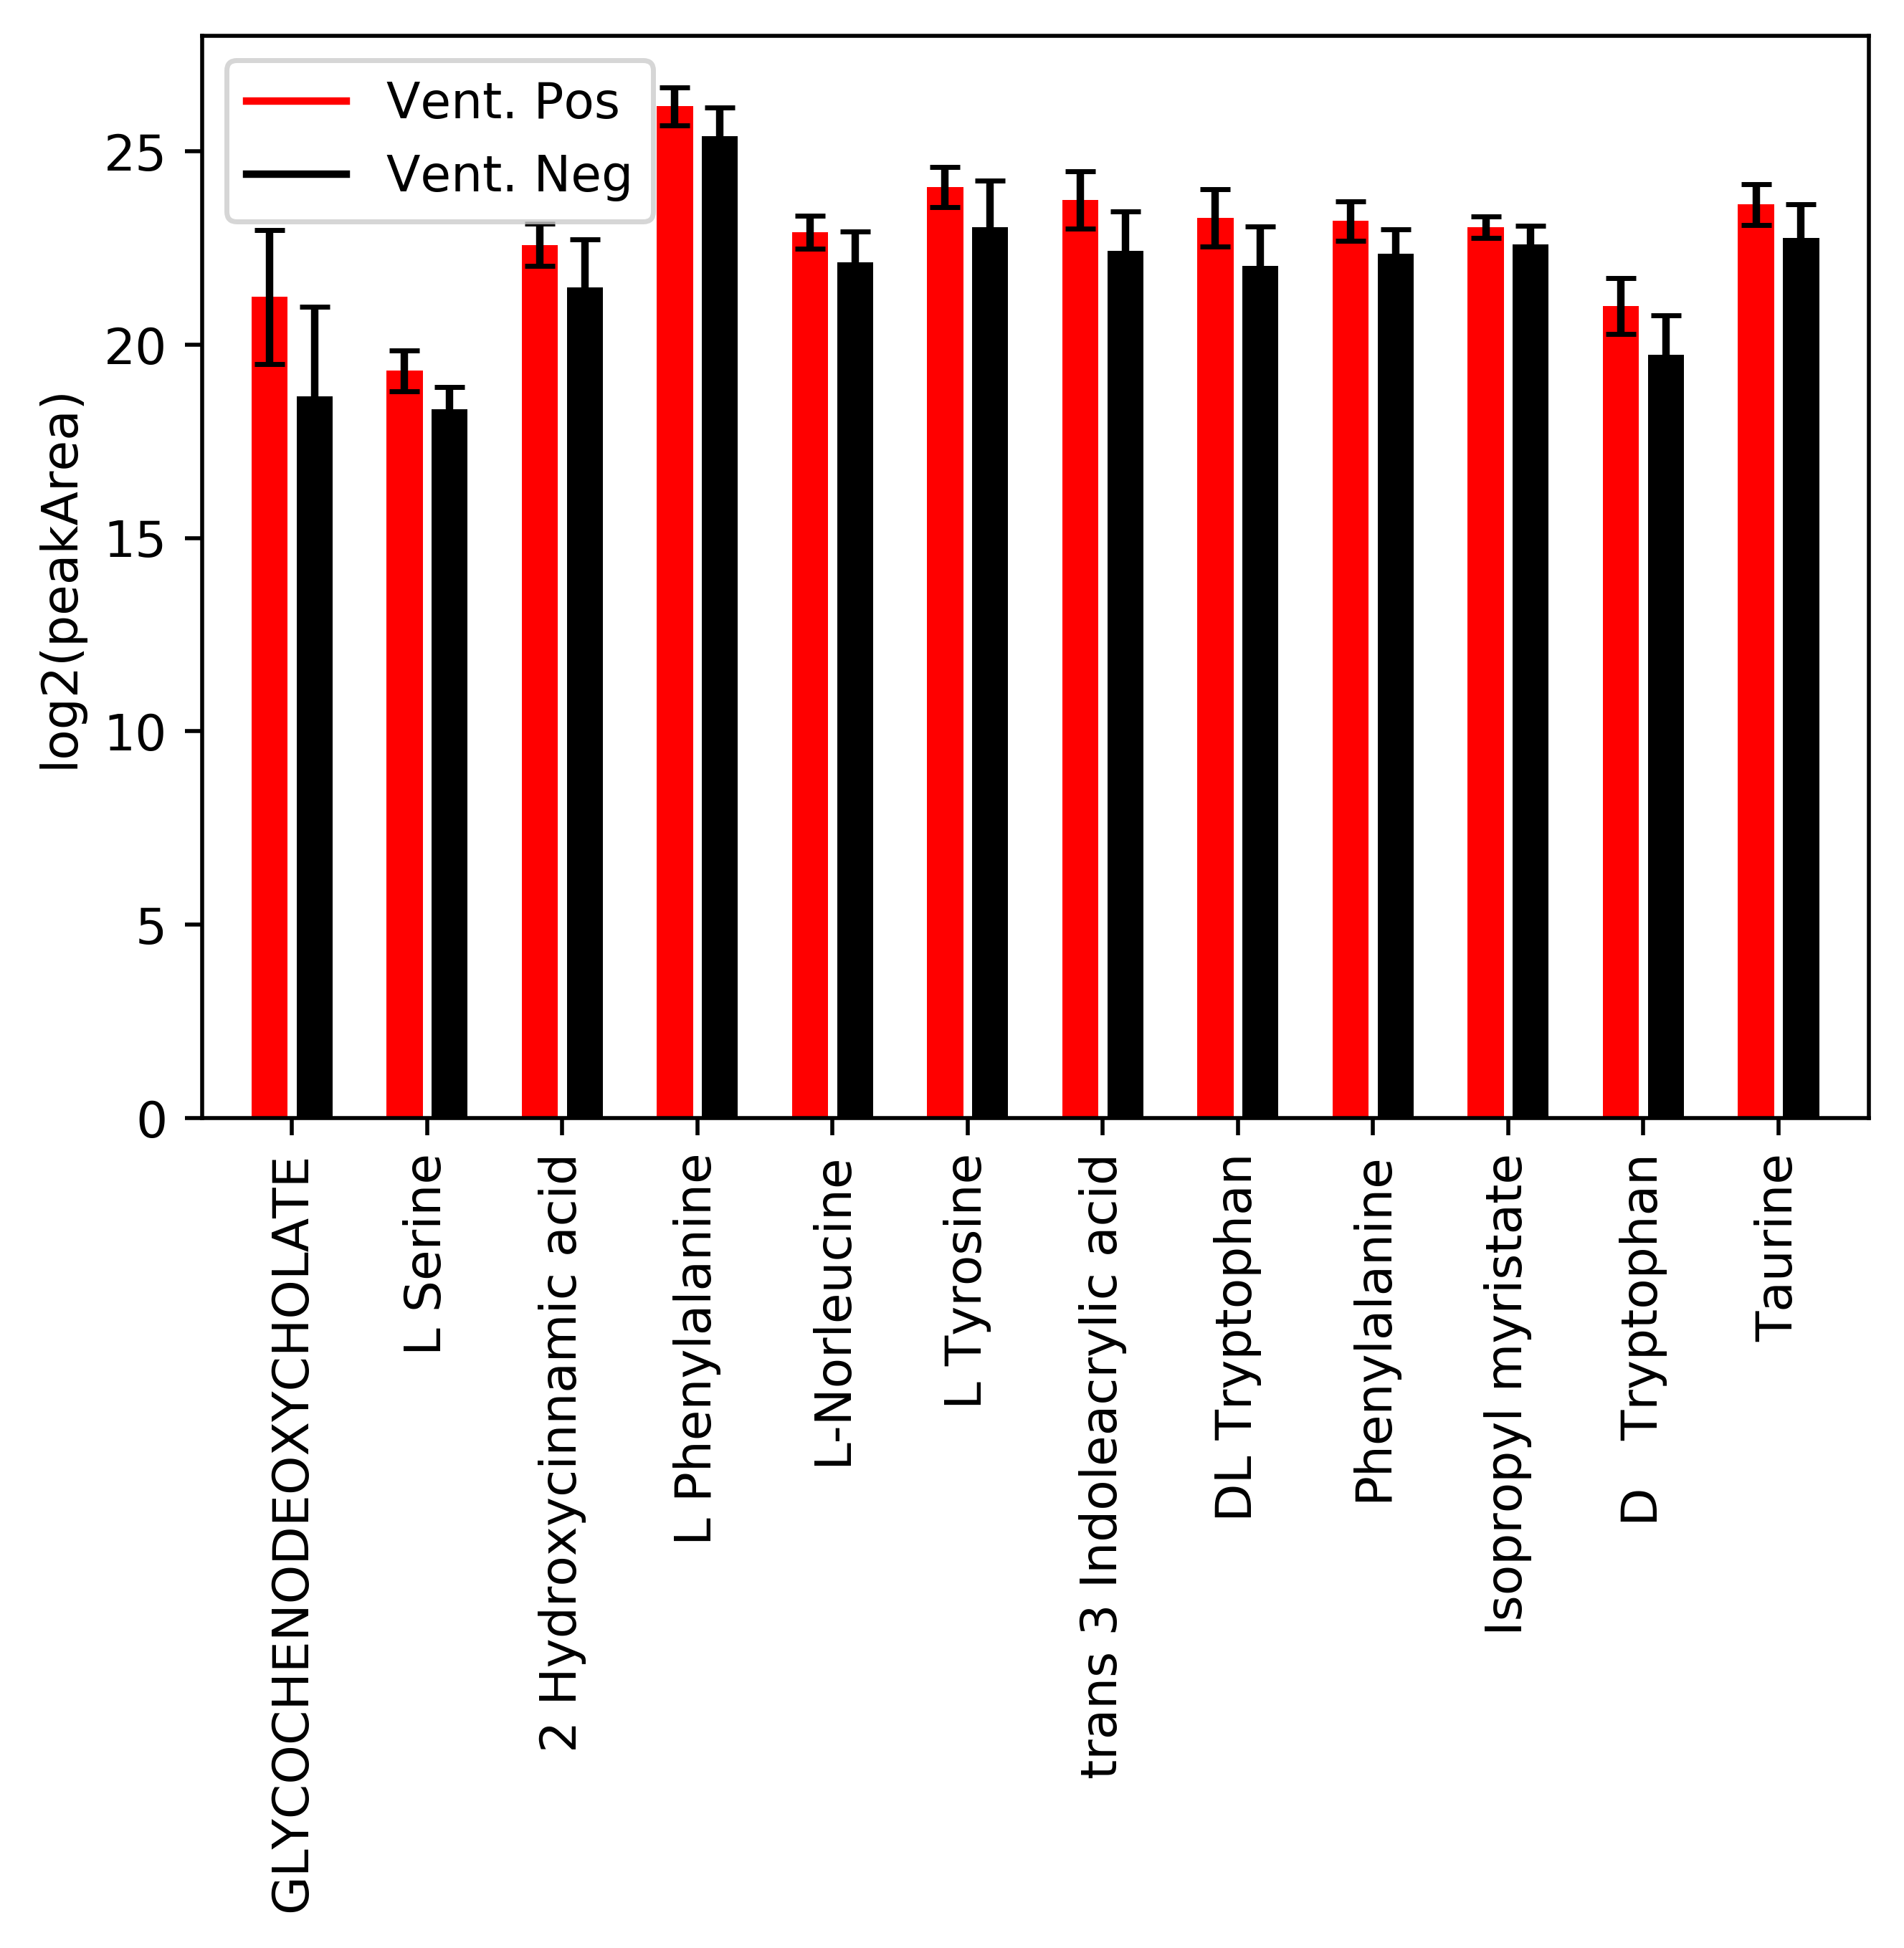

In [59]:
ventNeg = sampData_sig[vent_status_neg,:]
ventPos = sampData_sig[vent_status_pos,:]

pval = 0.05
fc = 2.0
pval_corr = pval/len(ventNeg)

sigMet = []

for met in range(len(ventNeg[0])):
    stat,p = stats.ttest_ind(ventNeg[:,met],ventPos[:,met])
    if p < pval_corr:
        sigMet.append(met)
        
print(len(sigMet))
    
xpos = 0
poses = []
labels = []
for met in sigMet:
    metName = data.at[data.index.values[goodMets[met]],"Molecule Name"].split("_")[1]
    plt.bar([xpos,xpos+1],[np.mean(ventNeg[:,met]),np.mean(ventPos[:,met])],yerr=[np.std(ventNeg[:,met]),np.std(ventPos[:,met])],color=["red","black"],capsize=3)
    poses.append(xpos+.5)
    labels.append(metName)
    xpos += 3
plt.plot([-10,-10],[0,1],color="red",label="Vent. Pos")
plt.plot([-10,-10],[0,1],color="black",label="Vent. Neg")

plt.xticks(poses,labels=labels,rotation = 90)
plt.xlim((min(poses)-2,max(poses)+2))
plt.legend()
plt.ylabel("log2(peakArea)")
    

0


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


ValueError: min() arg is an empty sequence

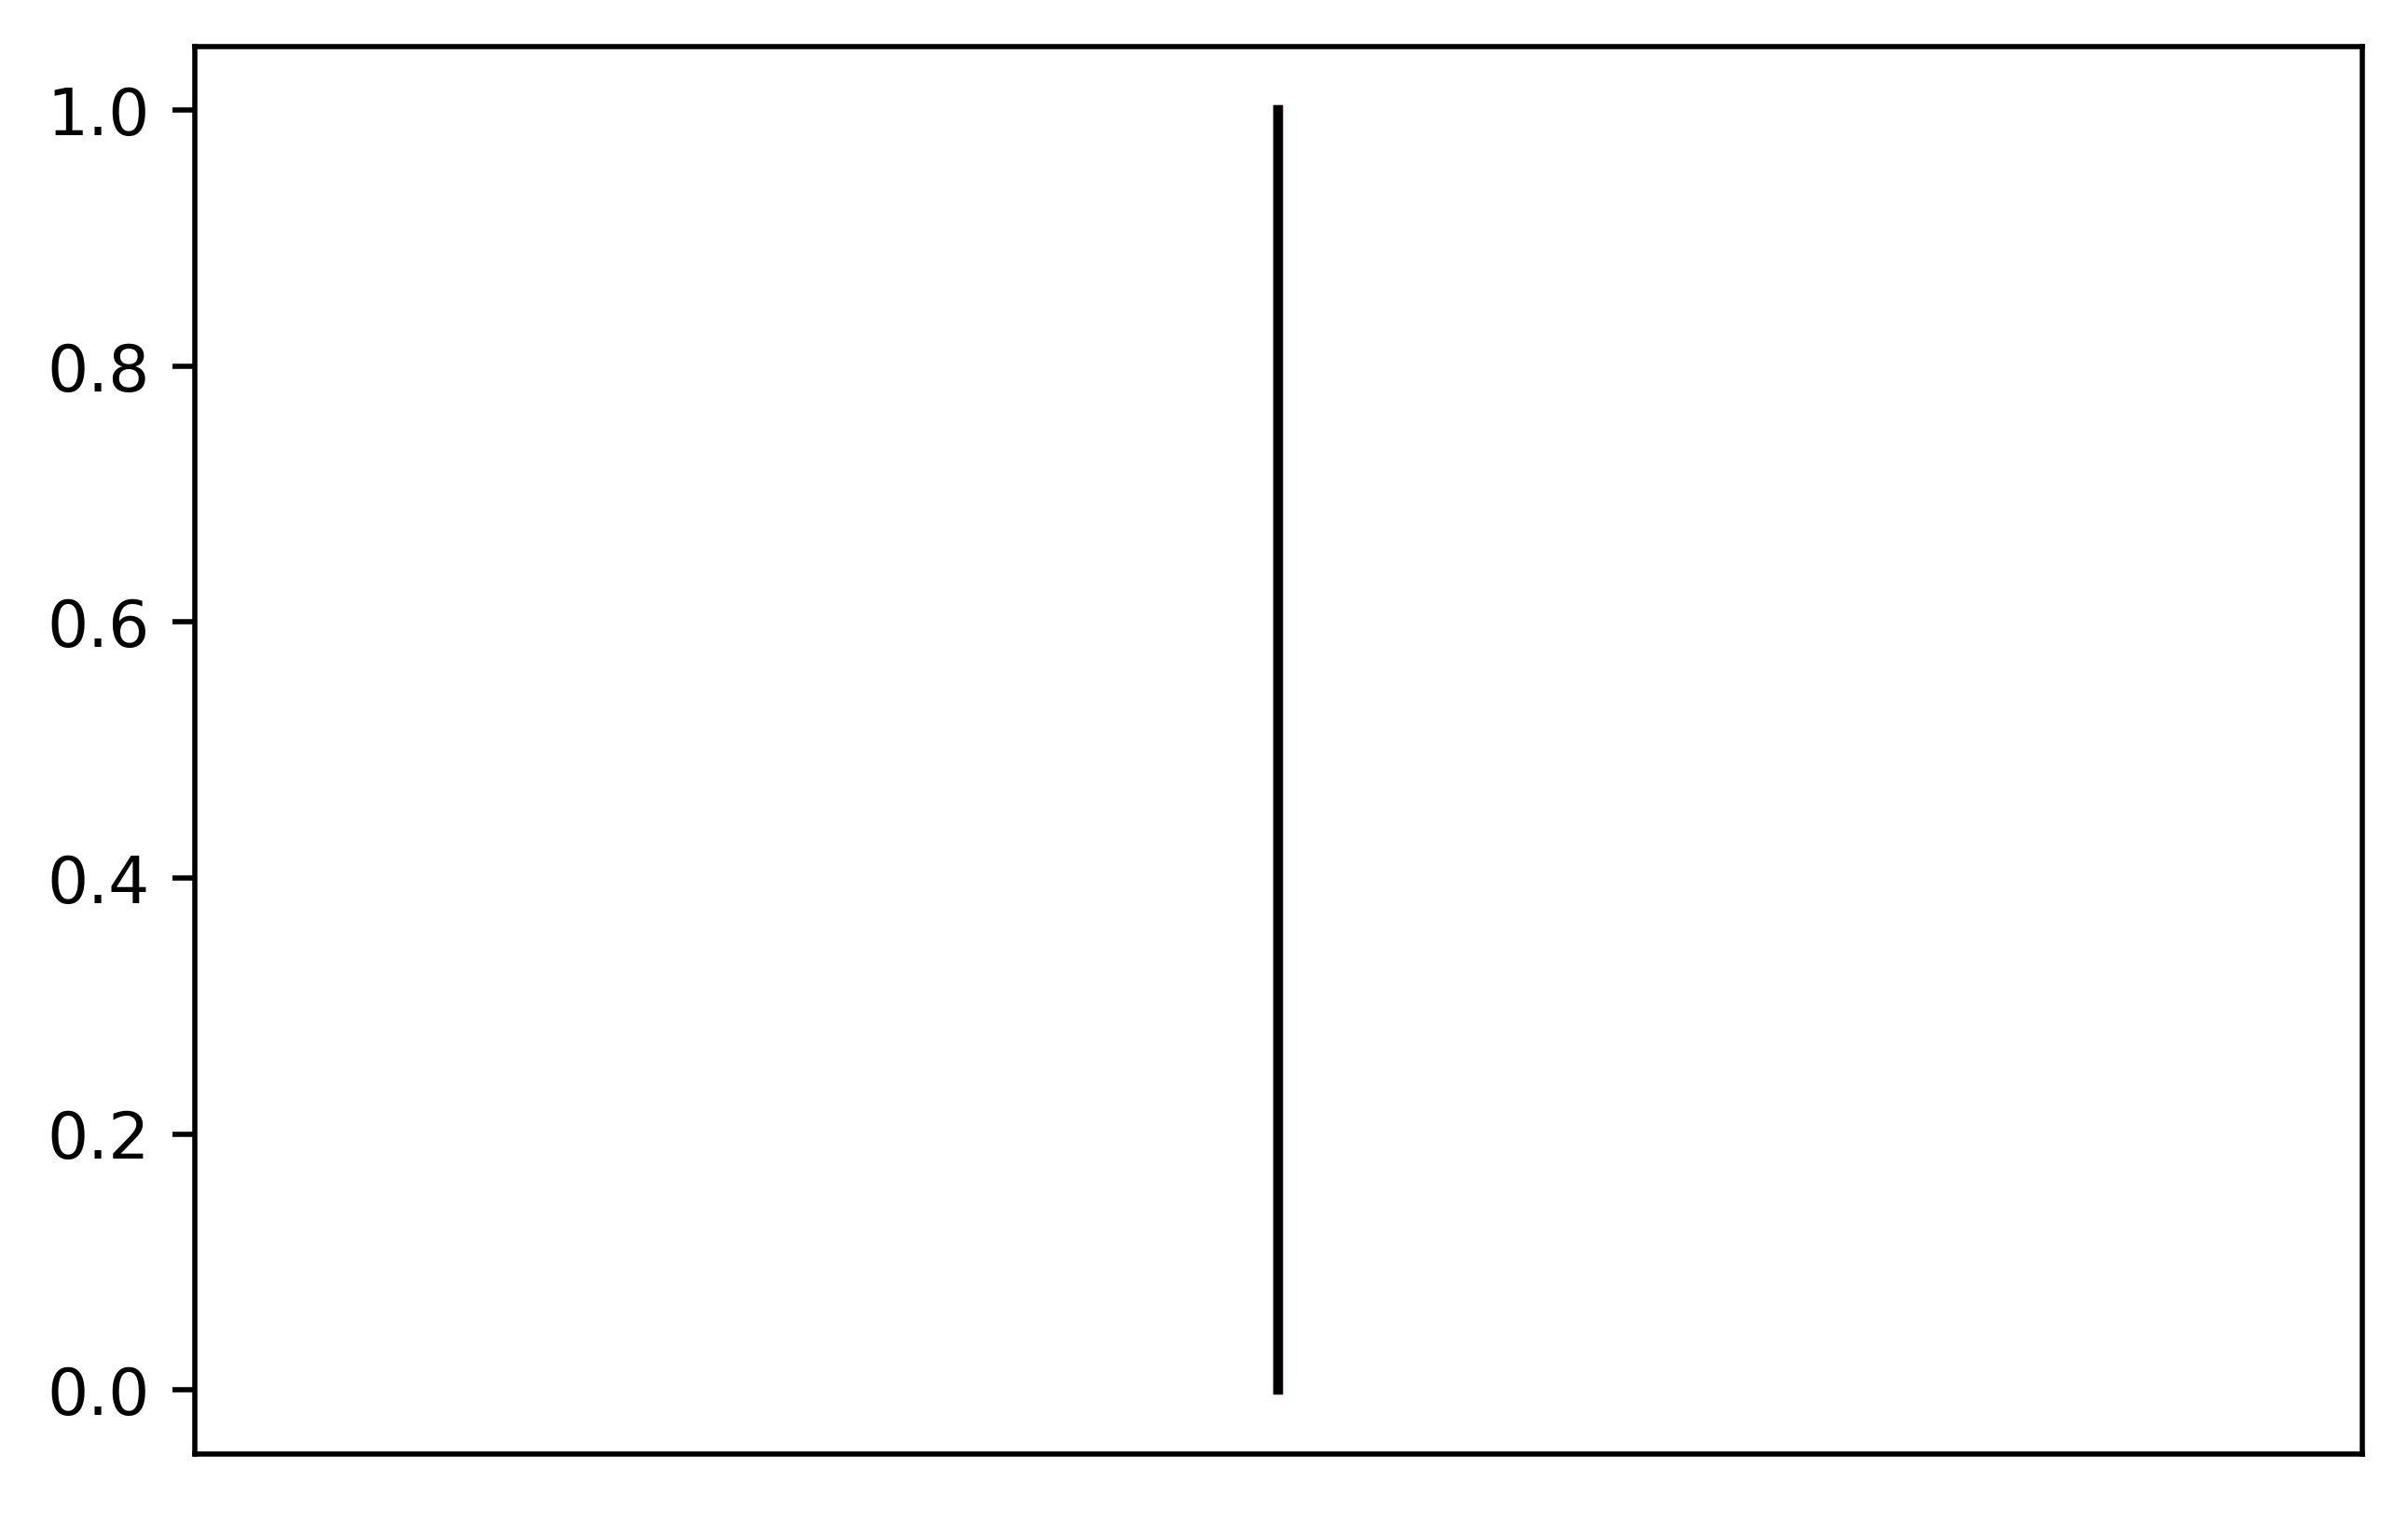

In [58]:
covidNeg = sampData_sig[covid_initial_status_neg,:]
covidPos = sampData_sig[covid_initial_status_pos,:]

pval = 0.05
fc = 2.0
pval_corr = pval/len(ventNeg)

sigMet = []

for met in range(len(ventNeg[0])):
    stat,p = stats.ttest_ind(covidNeg[:,met],covidPos[:,met])
    if p < pval_corr:
        sigMet.append(met)
        
print(len(sigMet))
    
xpos = 0
poses = []
labels = []
for met in sigMet:
    metName = data.at[data.index.values[goodMets[met]],"Molecule Name"].split("_")[1]
    plt.bar([xpos,xpos+1],[np.mean(covidNeg[:,met]),np.mean(covidPos[:,met])],yerr=[np.std(covidNeg[:,met]),np.std(covidPos[:,met])],color=["red","black"],capsize=3)
    poses.append(xpos+.5)
    labels.append(metName)
    xpos += 3
plt.plot([-10,-10],[0,1],color="red",label="Covid Pos")
plt.plot([-10,-10],[0,1],color="black",label="Covid. Neg")

plt.xticks(poses,labels=labels,rotation = 90)
plt.xlim((min(poses)-2,max(poses)+2))
plt.legend()
plt.ylabel("log2(peakArea)")